Nvidia GPU's = only GPU's that support **CUDA** = language + framework used to do deep learning

In [1]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
## remove dir if present already, re-clone fastai repo
!rm -r -f fastai
!git clone https://github.com/fastai/fastai.git

Cloning into 'fastai'...
remote: Counting objects: 5147, done.
remote: Total 5147 (delta 0), reused 0 (delta 0), pack-reused 5146
Receiving objects: 100% (5147/5147), 188.31 MiB | 34.72 MiB/s, done.
Resolving deltas: 100% (3246/3246), done.


In [0]:
# make sure conda is up to date
#!conda env update

In [4]:
!cd fastai | ls
# make sure fastai is up to date
#! git pull

data  datalab  dogscats.zip  fastai


In [0]:
%matplotlib inline

In [6]:
### DO THIS EVERY TIME WE CONNECT TO NEW VM
## default environment doesn’t have Pytorch or torchvision so install manually
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl | pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 996, in emit
    self.flush()
  File "/usr/lib/python3.6/logging/__init__.py", line 976, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/usr/local/bin/pip3", line 11, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/__init__.py", line 246, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/basecommand.py", line 228, in main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 291, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 103, in resolve
    self._resolve_one(requirement_set, req)
  File "/

## Image Classification w/ **Convolutional Neural Networks (CNN)**

### Dogs v. Cats

Will try to enter Dogs v. Cats on Kaggle: 25k labelled photos available for training, 12.5k in test set. At time of competition launch (2013), state of the art = 80% accuracy.

In [7]:
# fixed imread error
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install --no-cache-dir -I pillow
import PIL._imaging

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
    100% |████████████████████████████████| 2.0MB 18.7MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
import sys

# get to directory with .py files
sys.path.insert(0, './fastai/fastai/')

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [9]:
## remove data and dataset if present already, re-download, dataset, remake data folder, unzip data into /data
!rm -r -f data && rm -f dogscats.zip && mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

## import libraries
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np # linear algebra and data analysis
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

--2018-05-15 20:42:09--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  23.4MB/s    in 34s     

2018-05-15 20:42:43 (23.8 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.j

  inflating: data/dogscats/train/cats/cat.8111.jpg  
  inflating: data/dogscats/train/cats/cat.5634.jpg  
  inflating: data/dogscats/train/cats/cat.5699.jpg  
  inflating: data/dogscats/train/cats/cat.8052.jpg  
  inflating: data/dogscats/train/cats/cat.4496.jpg  
  inflating: data/dogscats/train/cats/cat.7958.jpg  
  inflating: data/dogscats/train/cats/cat.5478.jpg  
  inflating: data/dogscats/train/cats/cat.11692.jpg  
  inflating: data/dogscats/train/cats/cat.12102.jpg  
  inflating: data/dogscats/train/cats/cat.4775.jpg  
  inflating: data/dogscats/train/cats/cat.3772.jpg  
  inflating: data/dogscats/train/cats/cat.2926.jpg  
  inflating: data/dogscats/train/cats/cat.513.jpg  
  inflating: data/dogscats/train/cats/cat.1219.jpg  
  inflating: data/dogscats/train/cats/cat.6939.jpg  
  inflating: data/dogscats/train/cats/cat.6642.jpg  
  inflating: data/dogscats/train/cats/cat.2385.jpg  
  inflating: data/dogscats/train/cats/cat.7963.jpg  
  inflating: data/dogscats/train/cats/cat.434


  inflating: data/dogscats/train/cats/cat.234.jpg  
  inflating: data/dogscats/train/cats/cat.10829.jpg  
  inflating: data/dogscats/train/cats/cat.553.jpg  
  inflating: data/dogscats/train/cats/cat.11575.jpg  
  inflating: data/dogscats/train/cats/cat.10341.jpg  
  inflating: data/dogscats/train/cats/cat.12345.jpg  
  inflating: data/dogscats/train/cats/cat.12182.jpg  
  inflating: data/dogscats/train/cats/cat.7113.jpg  
  inflating: data/dogscats/train/cats/cat.5857.jpg  
  inflating: data/dogscats/train/cats/cat.6074.jpg  
  inflating: data/dogscats/train/cats/cat.3389.jpg  
  inflating: data/dogscats/train/cats/cat.2268.jpg  
  inflating: data/dogscats/train/cats/cat.8674.jpg  
  inflating: data/dogscats/train/cats/cat.10941.jpg  
  inflating: data/dogscats/train/cats/cat.6264.jpg  
  inflating: data/dogscats/train/cats/cat.7211.jpg  
  inflating: data/dogscats/train/cats/cat.8344.jpg  
  inflating: data/dogscats/train/cats/cat.1162.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.6699.jpg  
  inflating: data/dogscats/train/cats/cat.7577.jpg  
  inflating: data/dogscats/train/cats/cat.8406.jpg  
  inflating: data/dogscats/train/cats/cat.8408.jpg  
  inflating: data/dogscats/train/cats/cat.2911.jpg  
  inflating: data/dogscats/train/cats/cat.2462.jpg  
  inflating: data/dogscats/train/cats/cat.8984.jpg  
  inflating: data/dogscats/train/cats/cat.9279.jpg  
  inflating: data/dogscats/train/cats/cat.7964.jpg  
  inflating: data/dogscats/train/cats/cat.8043.jpg  
  inflating: data/dogscats/train/cats/cat.3642.jpg  
  inflating: data/dogscats/train/cats/cat.11455.jpg  
  inflating: data/dogscats/train/cats/cat.5541.jpg  
  inflating: data/dogscats/train/cats/cat.7387.jpg  
  inflating: data/dogscats/train/cats/cat.5509.jpg  
  inflating: data/dogscats/train/cats/cat.4422.jpg  
  inflating: data/dogscats/train/cats/cat.4571.jpg  
  inflating: data/dogscats/train/cats/cat.8465.jpg  
  inflating: data/dogscats/train/cats/cat.921

  inflating: data/dogscats/train/cats/cat.4794.jpg  
  inflating: data/dogscats/train/cats/cat.2891.jpg  
  inflating: data/dogscats/train/cats/cat.6756.jpg  
  inflating: data/dogscats/train/cats/cat.9802.jpg  
  inflating: data/dogscats/train/cats/cat.2171.jpg  
  inflating: data/dogscats/train/cats/cat.8343.jpg  
  inflating: data/dogscats/train/cats/cat.7192.jpg  
  inflating: data/dogscats/train/cats/cat.3337.jpg  
  inflating: data/dogscats/train/cats/cat.10500.jpg  
  inflating: data/dogscats/train/cats/cat.10441.jpg  
  inflating: data/dogscats/train/cats/cat.5360.jpg  
  inflating: data/dogscats/train/cats/cat.4634.jpg  
  inflating: data/dogscats/train/cats/cat.120.jpg  
  inflating: data/dogscats/train/cats/cat.1027.jpg  
  inflating: data/dogscats/train/cats/cat.9635.jpg  
  inflating: data/dogscats/train/cats/cat.11743.jpg  
  inflating: data/dogscats/train/cats/cat.1964.jpg  
  inflating: data/dogscats/train/cats/cat.5623.jpg  
  inflating: data/dogscats/train/cats/cat.29


  inflating: data/dogscats/train/cats/cat.11047.jpg  
  inflating: data/dogscats/train/cats/cat.895.jpg  
  inflating: data/dogscats/train/cats/cat.6193.jpg  
  inflating: data/dogscats/train/cats/cat.10859.jpg  
  inflating: data/dogscats/train/cats/cat.12488.jpg  
  inflating: data/dogscats/train/cats/cat.6969.jpg  
  inflating: data/dogscats/train/cats/cat.10541.jpg  
  inflating: data/dogscats/train/cats/cat.6630.jpg  
  inflating: data/dogscats/train/cats/cat.12149.jpg  
  inflating: data/dogscats/train/cats/cat.11063.jpg  
  inflating: data/dogscats/train/cats/cat.10542.jpg  
  inflating: data/dogscats/train/cats/cat.8095.jpg  
  inflating: data/dogscats/train/cats/cat.7535.jpg  
  inflating: data/dogscats/train/cats/cat.4258.jpg  
  inflating: data/dogscats/train/cats/cat.2287.jpg  
  inflating: data/dogscats/train/cats/cat.1753.jpg  
  inflating: data/dogscats/train/cats/cat.8115.jpg  
  inflating: data/dogscats/train/cats/cat.4539.jpg  
  inflating: data/dogscats/train/cats/c


  inflating: data/dogscats/train/cats/cat.2869.jpg  
  inflating: data/dogscats/train/cats/cat.529.jpg  
  inflating: data/dogscats/train/cats/cat.10809.jpg  
  inflating: data/dogscats/train/cats/cat.7579.jpg  
  inflating: data/dogscats/train/cats/cat.6159.jpg  
  inflating: data/dogscats/train/cats/cat.10437.jpg  
  inflating: data/dogscats/train/cats/cat.1571.jpg  
  inflating: data/dogscats/train/cats/cat.5222.jpg  
  inflating: data/dogscats/train/cats/cat.672.jpg  
  inflating: data/dogscats/train/cats/cat.7234.jpg  
  inflating: data/dogscats/train/cats/cat.1465.jpg  
  inflating: data/dogscats/train/cats/cat.4109.jpg  
  inflating: data/dogscats/train/cats/cat.11401.jpg  
  inflating: data/dogscats/train/cats/cat.1830.jpg  
  inflating: data/dogscats/train/cats/cat.7496.jpg  
  inflating: data/dogscats/train/cats/cat.9871.jpg  
  inflating: data/dogscats/train/cats/cat.3971.jpg  
  inflating: data/dogscats/train/cats/cat.4122.jpg  
  inflating: data/dogscats/train/cats/cat.11


  inflating: data/dogscats/train/cats/cat.1020.jpg  
  inflating: data/dogscats/train/cats/cat.12221.jpg  
  inflating: data/dogscats/train/cats/cat.8366.jpg  
  inflating: data/dogscats/train/cats/cat.4125.jpg  
  inflating: data/dogscats/train/cats/cat.6280.jpg  
  inflating: data/dogscats/train/cats/cat.7924.jpg  
  inflating: data/dogscats/train/cats/cat.5751.jpg  
  inflating: data/dogscats/train/cats/cat.7587.jpg  
  inflating: data/dogscats/train/cats/cat.314.jpg  
  inflating: data/dogscats/train/cats/cat.10526.jpg  
  inflating: data/dogscats/train/cats/cat.6807.jpg  
  inflating: data/dogscats/train/cats/cat.4893.jpg  
  inflating: data/dogscats/train/cats/cat.5918.jpg  
  inflating: data/dogscats/train/cats/cat.6293.jpg  
  inflating: data/dogscats/train/cats/cat.3852.jpg  
  inflating: data/dogscats/train/cats/cat.9743.jpg  
  inflating: data/dogscats/train/cats/cat.1663.jpg  
  inflating: data/dogscats/train/cats/cat.674.jpg  
  inflating: data/dogscats/train/cats/cat.118


  inflating: data/dogscats/train/cats/cat.1590.jpg  
  inflating: data/dogscats/train/cats/cat.9721.jpg  
  inflating: data/dogscats/train/cats/cat.5343.jpg  
  inflating: data/dogscats/train/cats/cat.2514.jpg  
  inflating: data/dogscats/train/cats/cat.10724.jpg  
  inflating: data/dogscats/train/cats/cat.4369.jpg  
  inflating: data/dogscats/train/cats/cat.10826.jpg  
  inflating: data/dogscats/train/cats/cat.4760.jpg  
  inflating: data/dogscats/train/cats/cat.3507.jpg  
  inflating: data/dogscats/train/cats/cat.4217.jpg  
  inflating: data/dogscats/train/cats/cat.851.jpg  
  inflating: data/dogscats/train/cats/cat.5407.jpg  
  inflating: data/dogscats/train/cats/cat.4663.jpg  
  inflating: data/dogscats/train/cats/cat.1535.jpg  
  inflating: data/dogscats/train/cats/cat.5006.jpg  
  inflating: data/dogscats/train/cats/cat.875.jpg  
  inflating: data/dogscats/train/cats/cat.1381.jpg  
  inflating: data/dogscats/train/cats/cat.3261.jpg  
  inflating: data/dogscats/train/cats/cat.237

  inflating: data/dogscats/train/cats/cat.8056.jpg  
  inflating: data/dogscats/train/cats/cat.1309.jpg  
  inflating: data/dogscats/train/cats/cat.11322.jpg  
  inflating: data/dogscats/train/cats/cat.506.jpg  
  inflating: data/dogscats/train/cats/cat.9285.jpg  
  inflating: data/dogscats/train/cats/cat.7895.jpg  
  inflating: data/dogscats/train/cats/cat.4545.jpg  
  inflating: data/dogscats/train/cats/cat.3400.jpg  
  inflating: data/dogscats/train/cats/cat.11522.jpg  
  inflating: data/dogscats/train/cats/cat.9623.jpg  
  inflating: data/dogscats/train/cats/cat.8161.jpg  
  inflating: data/dogscats/train/cats/cat.4633.jpg  
  inflating: data/dogscats/train/cats/cat.5911.jpg  
  inflating: data/dogscats/train/cats/cat.6753.jpg  
  inflating: data/dogscats/train/cats/cat.204.jpg  
  inflating: data/dogscats/train/cats/cat.9784.jpg  
  inflating: data/dogscats/train/cats/cat.2123.jpg  
  inflating: data/dogscats/train/cats/cat.10768.jpg  
  inflating: data/dogscats/train/cats/cat.745


  inflating: data/dogscats/train/cats/cat.3362.jpg  
  inflating: data/dogscats/train/cats/cat.11806.jpg  
  inflating: data/dogscats/train/cats/cat.7618.jpg  
  inflating: data/dogscats/train/cats/cat.12042.jpg  
  inflating: data/dogscats/train/cats/cat.2319.jpg  
  inflating: data/dogscats/train/cats/cat.8695.jpg  
  inflating: data/dogscats/train/cats/cat.5443.jpg  
  inflating: data/dogscats/train/cats/cat.2331.jpg  
  inflating: data/dogscats/train/cats/cat.1175.jpg  
  inflating: data/dogscats/train/cats/cat.278.jpg  
  inflating: data/dogscats/train/cats/cat.7316.jpg  
  inflating: data/dogscats/train/cats/cat.2576.jpg  
  inflating: data/dogscats/train/cats/cat.10555.jpg  
  inflating: data/dogscats/train/cats/cat.2886.jpg  
  inflating: data/dogscats/train/cats/cat.8884.jpg  
  inflating: data/dogscats/train/cats/cat.10894.jpg  
  inflating: data/dogscats/train/cats/cat.5061.jpg  
  inflating: data/dogscats/train/cats/cat.1093.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.1269.jpg  
  inflating: data/dogscats/train/cats/cat.9854.jpg  
  inflating: data/dogscats/train/cats/cat.2750.jpg  
  inflating: data/dogscats/train/cats/cat.1159.jpg  
  inflating: data/dogscats/train/cats/cat.6602.jpg  
  inflating: data/dogscats/train/cats/cat.4779.jpg  
  inflating: data/dogscats/train/cats/cat.363.jpg  
  inflating: data/dogscats/train/cats/cat.3175.jpg  
  inflating: data/dogscats/train/cats/cat.747.jpg  
  inflating: data/dogscats/train/cats/cat.3650.jpg  
  inflating: data/dogscats/train/cats/cat.3070.jpg  
  inflating: data/dogscats/train/cats/cat.4548.jpg  
  inflating: data/dogscats/train/cats/cat.8425.jpg  
  inflating: data/dogscats/train/cats/cat.6032.jpg  
  inflating: data/dogscats/train/cats/cat.8619.jpg  
  inflating: data/dogscats/train/cats/cat.9306.jpg  
  inflating: data/dogscats/train/cats/cat.8552.jpg  
  inflating: data/dogscats/train/cats/cat.916.jpg  
  inflating: data/dogscats/train/cats/cat.10242.


  inflating: data/dogscats/train/cats/cat.4813.jpg  
  inflating: data/dogscats/train/cats/cat.4450.jpg  
  inflating: data/dogscats/train/cats/cat.3325.jpg  
  inflating: data/dogscats/train/cats/cat.3758.jpg  
  inflating: data/dogscats/train/cats/cat.9361.jpg  
  inflating: data/dogscats/train/cats/cat.10374.jpg  
  inflating: data/dogscats/train/cats/cat.8583.jpg  
  inflating: data/dogscats/train/cats/cat.7080.jpg  
  inflating: data/dogscats/train/cats/cat.6788.jpg  
  inflating: data/dogscats/train/cats/cat.1542.jpg  
  inflating: data/dogscats/train/cats/cat.1887.jpg  
  inflating: data/dogscats/train/cats/cat.3553.jpg  
  inflating: data/dogscats/train/cats/cat.4584.jpg  
  inflating: data/dogscats/train/cats/cat.4143.jpg  
  inflating: data/dogscats/train/cats/cat.1407.jpg  
  inflating: data/dogscats/train/cats/cat.10925.jpg  
  inflating: data/dogscats/train/cats/cat.1712.jpg  
  inflating: data/dogscats/train/cats/cat.1180.jpg  
  inflating: data/dogscats/train/cats/cat.1


  inflating: data/dogscats/train/cats/cat.8276.jpg  
  inflating: data/dogscats/train/cats/cat.3704.jpg  
  inflating: data/dogscats/train/cats/cat.100.jpg  
  inflating: data/dogscats/train/cats/cat.4898.jpg  
  inflating: data/dogscats/train/cats/cat.4967.jpg  
  inflating: data/dogscats/train/cats/cat.7777.jpg  
  inflating: data/dogscats/train/cats/cat.4195.jpg  
  inflating: data/dogscats/train/cats/cat.3180.jpg  
  inflating: data/dogscats/train/cats/cat.11166.jpg  
  inflating: data/dogscats/train/cats/cat.10533.jpg  
  inflating: data/dogscats/train/cats/cat.8976.jpg  
  inflating: data/dogscats/train/cats/cat.8985.jpg  
  inflating: data/dogscats/train/cats/cat.468.jpg  
  inflating: data/dogscats/train/cats/cat.2751.jpg  
  inflating: data/dogscats/train/cats/cat.6359.jpg  
  inflating: data/dogscats/train/cats/cat.7378.jpg  
  inflating: data/dogscats/train/cats/cat.7246.jpg  
  inflating: data/dogscats/train/cats/cat.2158.jpg  
  inflating: data/dogscats/train/cats/cat.437

  inflating: data/dogscats/train/cats/cat.4809.jpg  
  inflating: data/dogscats/train/cats/cat.1371.jpg  
  inflating: data/dogscats/train/cats/cat.2020.jpg  
  inflating: data/dogscats/train/cats/cat.8682.jpg  
  inflating: data/dogscats/train/cats/cat.3569.jpg  
  inflating: data/dogscats/train/cats/cat.923.jpg  
  inflating: data/dogscats/train/cats/cat.1602.jpg  
  inflating: data/dogscats/train/cats/cat.11965.jpg  
  inflating: data/dogscats/train/cats/cat.12481.jpg  
  inflating: data/dogscats/train/cats/cat.7646.jpg  
  inflating: data/dogscats/train/cats/cat.2993.jpg  
  inflating: data/dogscats/train/cats/cat.8256.jpg  
  inflating: data/dogscats/train/cats/cat.11043.jpg  
  inflating: data/dogscats/train/cats/cat.378.jpg  
  inflating: data/dogscats/train/cats/cat.5722.jpg  
  inflating: data/dogscats/train/cats/cat.1968.jpg  
  inflating: data/dogscats/train/cats/cat.11727.jpg  
  inflating: data/dogscats/train/cats/cat.8382.jpg  
  inflating: data/dogscats/train/cats/cat.11

  inflating: data/dogscats/train/cats/cat.3519.jpg  
  inflating: data/dogscats/train/cats/cat.1839.jpg  
  inflating: data/dogscats/train/cats/cat.6406.jpg  
  inflating: data/dogscats/train/cats/cat.7465.jpg  
  inflating: data/dogscats/train/cats/cat.6628.jpg  
  inflating: data/dogscats/train/cats/cat.9747.jpg  
  inflating: data/dogscats/train/cats/cat.4733.jpg  
  inflating: data/dogscats/train/cats/cat.2709.jpg  
  inflating: data/dogscats/train/cats/cat.3177.jpg  
  inflating: data/dogscats/train/cats/cat.5245.jpg  
  inflating: data/dogscats/train/cats/cat.9853.jpg  
  inflating: data/dogscats/train/cats/cat.7164.jpg  
  inflating: data/dogscats/train/cats/cat.11443.jpg  
  inflating: data/dogscats/train/cats/cat.1904.jpg  
  inflating: data/dogscats/train/cats/cat.5411.jpg  
  inflating: data/dogscats/train/cats/cat.6772.jpg  
  inflating: data/dogscats/train/cats/cat.1951.jpg  
  inflating: data/dogscats/train/cats/cat.4290.jpg  
  inflating: data/dogscats/train/cats/cat.990


  inflating: data/dogscats/train/cats/cat.1000.jpg  
  inflating: data/dogscats/train/cats/cat.9620.jpg  
  inflating: data/dogscats/train/cats/cat.4416.jpg  
  inflating: data/dogscats/train/cats/cat.12.jpg  
  inflating: data/dogscats/train/cats/cat.3095.jpg  
  inflating: data/dogscats/train/cats/cat.2796.jpg  
  inflating: data/dogscats/train/cats/cat.8083.jpg  
  inflating: data/dogscats/train/cats/cat.3038.jpg  
  inflating: data/dogscats/train/cats/cat.5272.jpg  
  inflating: data/dogscats/train/cats/cat.3456.jpg  
  inflating: data/dogscats/train/cats/cat.3840.jpg  
  inflating: data/dogscats/train/cats/cat.106.jpg  
  inflating: data/dogscats/train/cats/cat.10495.jpg  
  inflating: data/dogscats/train/cats/cat.2420.jpg  
  inflating: data/dogscats/train/cats/cat.8019.jpg  
  inflating: data/dogscats/train/cats/cat.2761.jpg  
  inflating: data/dogscats/train/cats/cat.8205.jpg  
  inflating: data/dogscats/train/cats/cat.8241.jpg  
  inflating: data/dogscats/train/cats/cat.10688

  inflating: data/dogscats/train/cats/cat.1738.jpg  
  inflating: data/dogscats/train/cats/cat.2794.jpg  
  inflating: data/dogscats/train/cats/cat.6095.jpg  
  inflating: data/dogscats/train/cats/cat.3108.jpg  
  inflating: data/dogscats/train/cats/cat.11843.jpg  
  inflating: data/dogscats/train/cats/cat.2597.jpg  
  inflating: data/dogscats/train/cats/cat.3610.jpg  
  inflating: data/dogscats/train/cats/cat.12006.jpg  
  inflating: data/dogscats/train/cats/cat.2783.jpg  
  inflating: data/dogscats/train/cats/cat.2663.jpg  
  inflating: data/dogscats/train/cats/cat.20.jpg  
  inflating: data/dogscats/train/cats/cat.8499.jpg  
  inflating: data/dogscats/train/cats/cat.4520.jpg  
  inflating: data/dogscats/train/cats/cat.2623.jpg  
  inflating: data/dogscats/train/cats/cat.10176.jpg  
  inflating: data/dogscats/train/cats/cat.9303.jpg  
  inflating: data/dogscats/train/cats/cat.5767.jpg  
  inflating: data/dogscats/train/cats/cat.10535.jpg  
  inflating: data/dogscats/train/cats/cat.96

  inflating: data/dogscats/train/cats/cat.4603.jpg  
  inflating: data/dogscats/train/cats/cat.8369.jpg  
  inflating: data/dogscats/train/cats/cat.2608.jpg  
  inflating: data/dogscats/train/cats/cat.11844.jpg  
  inflating: data/dogscats/train/cats/cat.5790.jpg  
  inflating: data/dogscats/train/cats/cat.10413.jpg  
  inflating: data/dogscats/train/cats/cat.10524.jpg  
  inflating: data/dogscats/train/cats/cat.134.jpg  
  inflating: data/dogscats/train/cats/cat.6537.jpg  
  inflating: data/dogscats/train/cats/cat.11859.jpg  
  inflating: data/dogscats/train/cats/cat.2568.jpg  
  inflating: data/dogscats/train/cats/cat.8361.jpg  
  inflating: data/dogscats/train/cats/cat.12204.jpg  
  inflating: data/dogscats/train/cats/cat.11944.jpg  
  inflating: data/dogscats/train/cats/cat.4208.jpg  
  inflating: data/dogscats/train/cats/cat.2870.jpg  
  inflating: data/dogscats/train/cats/cat.11763.jpg  
  inflating: data/dogscats/train/cats/cat.386.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/dogs/dog.9111.jpg  
  inflating: data/dogscats/train/dogs/dog.9015.jpg  
  inflating: data/dogscats/train/dogs/dog.10854.jpg  
  inflating: data/dogscats/train/dogs/dog.8429.jpg  
  inflating: data/dogscats/train/dogs/dog.7797.jpg  
  inflating: data/dogscats/train/dogs/dog.10298.jpg  
  inflating: data/dogscats/train/dogs/dog.5511.jpg  
  inflating: data/dogscats/train/dogs/dog.841.jpg  
  inflating: data/dogscats/train/dogs/dog.6337.jpg  
  inflating: data/dogscats/train/dogs/dog.12482.jpg  
  inflating: data/dogscats/train/dogs/dog.3874.jpg  
  inflating: data/dogscats/train/dogs/dog.3686.jpg  
  inflating: data/dogscats/train/dogs/dog.12468.jpg  
  inflating: data/dogscats/train/dogs/dog.11505.jpg  
  inflating: data/dogscats/train/dogs/dog.10107.jpg  
  inflating: data/dogscats/train/dogs/dog.65.jpg  
  inflating: data/dogscats/train/dogs/dog.431.jpg  
  inflating: data/dogscats/train/dogs/dog.2699.jpg  
  inflating: data/dogscats/train/dogs/dog.6


  inflating: data/dogscats/train/dogs/dog.9535.jpg  
  inflating: data/dogscats/train/dogs/dog.1346.jpg  
  inflating: data/dogscats/train/dogs/dog.5948.jpg  
  inflating: data/dogscats/train/dogs/dog.11243.jpg  
  inflating: data/dogscats/train/dogs/dog.4732.jpg  
  inflating: data/dogscats/train/dogs/dog.8845.jpg  
  inflating: data/dogscats/train/dogs/dog.8148.jpg  
  inflating: data/dogscats/train/dogs/dog.4093.jpg  
  inflating: data/dogscats/train/dogs/dog.1888.jpg  
  inflating: data/dogscats/train/dogs/dog.5169.jpg  
  inflating: data/dogscats/train/dogs/dog.10285.jpg  
  inflating: data/dogscats/train/dogs/dog.11730.jpg  
  inflating: data/dogscats/train/dogs/dog.2602.jpg  
  inflating: data/dogscats/train/dogs/dog.5375.jpg  
  inflating: data/dogscats/train/dogs/dog.9460.jpg  
  inflating: data/dogscats/train/dogs/dog.4883.jpg  
  inflating: data/dogscats/train/dogs/dog.10870.jpg  
  inflating: data/dogscats/train/dogs/dog.3058.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.3098.jpg  
  inflating: data/dogscats/train/dogs/dog.9071.jpg  
  inflating: data/dogscats/train/dogs/dog.7992.jpg  
  inflating: data/dogscats/train/dogs/dog.11038.jpg  
  inflating: data/dogscats/train/dogs/dog.9793.jpg  
  inflating: data/dogscats/train/dogs/dog.4925.jpg  
  inflating: data/dogscats/train/dogs/dog.10070.jpg  
  inflating: data/dogscats/train/dogs/dog.5268.jpg  
  inflating: data/dogscats/train/dogs/dog.17.jpg  
  inflating: data/dogscats/train/dogs/dog.7877.jpg  
  inflating: data/dogscats/train/dogs/dog.10679.jpg  
  inflating: data/dogscats/train/dogs/dog.1652.jpg  
  inflating: data/dogscats/train/dogs/dog.10688.jpg  
  inflating: data/dogscats/train/dogs/dog.876.jpg  
  inflating: data/dogscats/train/dogs/dog.6252.jpg  
  inflating: data/dogscats/train/dogs/dog.5300.jpg  
  inflating: data/dogscats/train/dogs/dog.8184.jpg  
  inflating: data/dogscats/train/dogs/dog.9430.jpg  
  inflating: data/dogscats/train/dogs/dog.377


  inflating: data/dogscats/train/dogs/dog.1282.jpg  
  inflating: data/dogscats/train/dogs/dog.9758.jpg  
  inflating: data/dogscats/train/dogs/dog.6432.jpg  
  inflating: data/dogscats/train/dogs/dog.3735.jpg  
  inflating: data/dogscats/train/dogs/dog.6264.jpg  
  inflating: data/dogscats/train/dogs/dog.8781.jpg  
  inflating: data/dogscats/train/dogs/dog.3692.jpg  
  inflating: data/dogscats/train/dogs/dog.8535.jpg  
  inflating: data/dogscats/train/dogs/dog.4718.jpg  
  inflating: data/dogscats/train/dogs/dog.7921.jpg  
  inflating: data/dogscats/train/dogs/dog.7738.jpg  
  inflating: data/dogscats/train/dogs/dog.8960.jpg  
  inflating: data/dogscats/train/dogs/dog.11887.jpg  
  inflating: data/dogscats/train/dogs/dog.2747.jpg  
  inflating: data/dogscats/train/dogs/dog.1059.jpg  
  inflating: data/dogscats/train/dogs/dog.7038.jpg  
  inflating: data/dogscats/train/dogs/dog.4277.jpg  
  inflating: data/dogscats/train/dogs/dog.3657.jpg  
  inflating: data/dogscats/train/dogs/dog.98

  inflating: data/dogscats/train/dogs/dog.3212.jpg  
  inflating: data/dogscats/train/dogs/dog.9641.jpg  
  inflating: data/dogscats/train/dogs/dog.942.jpg  
  inflating: data/dogscats/train/dogs/dog.7625.jpg  
  inflating: data/dogscats/train/dogs/dog.8964.jpg  
  inflating: data/dogscats/train/dogs/dog.4415.jpg  
  inflating: data/dogscats/train/dogs/dog.1976.jpg  
  inflating: data/dogscats/train/dogs/dog.7497.jpg  
  inflating: data/dogscats/train/dogs/dog.345.jpg  
  inflating: data/dogscats/train/dogs/dog.6307.jpg  
  inflating: data/dogscats/train/dogs/dog.12142.jpg  
  inflating: data/dogscats/train/dogs/dog.3078.jpg  
  inflating: data/dogscats/train/dogs/dog.4157.jpg  
  inflating: data/dogscats/train/dogs/dog.8291.jpg  
  inflating: data/dogscats/train/dogs/dog.3800.jpg  
  inflating: data/dogscats/train/dogs/dog.7156.jpg  
  inflating: data/dogscats/train/dogs/dog.3005.jpg  
  inflating: data/dogscats/train/dogs/dog.1124.jpg  
  inflating: data/dogscats/train/dogs/dog.1790.


  inflating: data/dogscats/train/dogs/dog.8809.jpg  
  inflating: data/dogscats/train/dogs/dog.410.jpg  
  inflating: data/dogscats/train/dogs/dog.10681.jpg  
  inflating: data/dogscats/train/dogs/dog.1706.jpg  
  inflating: data/dogscats/train/dogs/dog.12234.jpg  
  inflating: data/dogscats/train/dogs/dog.4390.jpg  
  inflating: data/dogscats/train/dogs/dog.7442.jpg  
  inflating: data/dogscats/train/dogs/dog.3828.jpg  
  inflating: data/dogscats/train/dogs/dog.2915.jpg  
  inflating: data/dogscats/train/dogs/dog.856.jpg  
  inflating: data/dogscats/train/dogs/dog.4857.jpg  
  inflating: data/dogscats/train/dogs/dog.11699.jpg  
  inflating: data/dogscats/train/dogs/dog.5225.jpg  
  inflating: data/dogscats/train/dogs/dog.12317.jpg  
  inflating: data/dogscats/train/dogs/dog.12457.jpg  
  inflating: data/dogscats/train/dogs/dog.10372.jpg  
  inflating: data/dogscats/train/dogs/dog.12003.jpg  
  inflating: data/dogscats/train/dogs/dog.4602.jpg  
  inflating: data/dogscats/train/dogs/do


  inflating: data/dogscats/train/dogs/dog.5218.jpg  
  inflating: data/dogscats/train/dogs/dog.6451.jpg  
  inflating: data/dogscats/train/dogs/dog.2192.jpg  
  inflating: data/dogscats/train/dogs/dog.6570.jpg  
  inflating: data/dogscats/train/dogs/dog.6643.jpg  
  inflating: data/dogscats/train/dogs/dog.9683.jpg  
  inflating: data/dogscats/train/dogs/dog.1692.jpg  
  inflating: data/dogscats/train/dogs/dog.12092.jpg  
  inflating: data/dogscats/train/dogs/dog.6604.jpg  
  inflating: data/dogscats/train/dogs/dog.10885.jpg  
  inflating: data/dogscats/train/dogs/dog.782.jpg  
  inflating: data/dogscats/train/dogs/dog.7358.jpg  
  inflating: data/dogscats/train/dogs/dog.2304.jpg  
  inflating: data/dogscats/train/dogs/dog.1988.jpg  
  inflating: data/dogscats/train/dogs/dog.8254.jpg  
  inflating: data/dogscats/train/dogs/dog.12431.jpg  
  inflating: data/dogscats/train/dogs/dog.10706.jpg  
  inflating: data/dogscats/train/dogs/dog.7726.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.4941.jpg  
  inflating: data/dogscats/train/dogs/dog.10055.jpg  
  inflating: data/dogscats/train/dogs/dog.4825.jpg  
  inflating: data/dogscats/train/dogs/dog.4847.jpg  
  inflating: data/dogscats/train/dogs/dog.8618.jpg  
  inflating: data/dogscats/train/dogs/dog.3804.jpg  
  inflating: data/dogscats/train/dogs/dog.9449.jpg  
  inflating: data/dogscats/train/dogs/dog.11728.jpg  
  inflating: data/dogscats/train/dogs/dog.4258.jpg  
  inflating: data/dogscats/train/dogs/dog.3080.jpg  
  inflating: data/dogscats/train/dogs/dog.3367.jpg  
  inflating: data/dogscats/train/dogs/dog.4016.jpg  
  inflating: data/dogscats/train/dogs/dog.4200.jpg  
  inflating: data/dogscats/train/dogs/dog.10836.jpg  
  inflating: data/dogscats/train/dogs/dog.11430.jpg  
  inflating: data/dogscats/train/dogs/dog.11148.jpg  
  inflating: data/dogscats/train/dogs/dog.2472.jpg  
  inflating: data/dogscats/train/dogs/dog.5935.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.3864.jpg  
  inflating: data/dogscats/train/dogs/dog.8428.jpg  
  inflating: data/dogscats/train/dogs/dog.9488.jpg  
  inflating: data/dogscats/train/dogs/dog.3610.jpg  
  inflating: data/dogscats/train/dogs/dog.9623.jpg  
  inflating: data/dogscats/train/dogs/dog.4996.jpg  
  inflating: data/dogscats/train/dogs/dog.5024.jpg  
  inflating: data/dogscats/train/dogs/dog.11512.jpg  
  inflating: data/dogscats/train/dogs/dog.10025.jpg  
  inflating: data/dogscats/train/dogs/dog.1274.jpg  
  inflating: data/dogscats/train/dogs/dog.11385.jpg  
  inflating: data/dogscats/train/dogs/dog.10367.jpg  
  inflating: data/dogscats/train/dogs/dog.2506.jpg  
  inflating: data/dogscats/train/dogs/dog.9922.jpg  
  inflating: data/dogscats/train/dogs/dog.8541.jpg  
  inflating: data/dogscats/train/dogs/dog.4884.jpg  
  inflating: data/dogscats/train/dogs/dog.10036.jpg  
  inflating: data/dogscats/train/dogs/dog.6300.jpg  
  inflating: data/dogscats/train/dogs/do

  inflating: data/dogscats/train/dogs/dog.12453.jpg  
  inflating: data/dogscats/train/dogs/dog.5591.jpg  
  inflating: data/dogscats/train/dogs/dog.1315.jpg  
  inflating: data/dogscats/train/dogs/dog.735.jpg  
  inflating: data/dogscats/train/dogs/dog.11633.jpg  
  inflating: data/dogscats/train/dogs/dog.13.jpg  
  inflating: data/dogscats/train/dogs/dog.3473.jpg  
  inflating: data/dogscats/train/dogs/dog.5426.jpg  
  inflating: data/dogscats/train/dogs/dog.5302.jpg  
  inflating: data/dogscats/train/dogs/dog.8755.jpg  
  inflating: data/dogscats/train/dogs/dog.11332.jpg  
  inflating: data/dogscats/train/dogs/dog.6065.jpg  
  inflating: data/dogscats/train/dogs/dog.1097.jpg  
  inflating: data/dogscats/train/dogs/dog.11178.jpg  
  inflating: data/dogscats/train/dogs/dog.12135.jpg  
  inflating: data/dogscats/train/dogs/dog.5438.jpg  
  inflating: data/dogscats/train/dogs/dog.9490.jpg  
  inflating: data/dogscats/train/dogs/dog.919.jpg  
  inflating: data/dogscats/train/dogs/dog.133


  inflating: data/dogscats/train/dogs/dog.8542.jpg  
  inflating: data/dogscats/train/dogs/dog.4248.jpg  
  inflating: data/dogscats/train/dogs/dog.4308.jpg  
  inflating: data/dogscats/train/dogs/dog.8655.jpg  
  inflating: data/dogscats/train/dogs/dog.11740.jpg  
  inflating: data/dogscats/train/dogs/dog.5995.jpg  
  inflating: data/dogscats/train/dogs/dog.387.jpg  
  inflating: data/dogscats/train/dogs/dog.3771.jpg  
  inflating: data/dogscats/train/dogs/dog.10840.jpg  
  inflating: data/dogscats/train/dogs/dog.10196.jpg  
  inflating: data/dogscats/train/dogs/dog.7783.jpg  
  inflating: data/dogscats/train/dogs/dog.5928.jpg  
  inflating: data/dogscats/train/dogs/dog.6485.jpg  
  inflating: data/dogscats/train/dogs/dog.6633.jpg  
  inflating: data/dogscats/train/dogs/dog.1742.jpg  
  inflating: data/dogscats/train/dogs/dog.3852.jpg  
  inflating: data/dogscats/train/dogs/dog.10478.jpg  
  inflating: data/dogscats/train/dogs/dog.4789.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.4103.jpg  
  inflating: data/dogscats/train/dogs/dog.9747.jpg  
  inflating: data/dogscats/train/dogs/dog.5450.jpg  
  inflating: data/dogscats/train/dogs/dog.10722.jpg  
  inflating: data/dogscats/train/dogs/dog.3334.jpg  
  inflating: data/dogscats/train/dogs/dog.10752.jpg  
  inflating: data/dogscats/train/dogs/dog.29.jpg  
  inflating: data/dogscats/train/dogs/dog.835.jpg  
  inflating: data/dogscats/train/dogs/dog.6422.jpg  
  inflating: data/dogscats/train/dogs/dog.7659.jpg  
  inflating: data/dogscats/train/dogs/dog.3272.jpg  
  inflating: data/dogscats/train/dogs/dog.2086.jpg  
  inflating: data/dogscats/train/dogs/dog.7431.jpg  
  inflating: data/dogscats/train/dogs/dog.11103.jpg  
  inflating: data/dogscats/train/dogs/dog.7466.jpg  
  inflating: data/dogscats/train/dogs/dog.4621.jpg  
  inflating: data/dogscats/train/dogs/dog.3639.jpg  
  inflating: data/dogscats/train/dogs/dog.102.jpg  
  inflating: data/dogscats/train/dogs/dog.3342


  inflating: data/dogscats/train/dogs/dog.4185.jpg  
  inflating: data/dogscats/train/dogs/dog.4980.jpg  
  inflating: data/dogscats/train/dogs/dog.6569.jpg  
  inflating: data/dogscats/train/dogs/dog.3350.jpg  
  inflating: data/dogscats/train/dogs/dog.5414.jpg  
  inflating: data/dogscats/train/dogs/dog.5568.jpg  
  inflating: data/dogscats/train/dogs/dog.11191.jpg  
  inflating: data/dogscats/train/dogs/dog.8848.jpg  
  inflating: data/dogscats/train/dogs/dog.11984.jpg  
  inflating: data/dogscats/train/dogs/dog.8698.jpg  
  inflating: data/dogscats/train/dogs/dog.2672.jpg  
  inflating: data/dogscats/train/dogs/dog.3965.jpg  
  inflating: data/dogscats/train/dogs/dog.5084.jpg  
  inflating: data/dogscats/train/dogs/dog.3557.jpg  
  inflating: data/dogscats/train/dogs/dog.12263.jpg  
  inflating: data/dogscats/train/dogs/dog.7546.jpg  
  inflating: data/dogscats/train/dogs/dog.501.jpg  
  inflating: data/dogscats/train/dogs/dog.6483.jpg  
  inflating: data/dogscats/train/dogs/dog.3

  inflating: data/dogscats/train/dogs/dog.11288.jpg  
  inflating: data/dogscats/train/dogs/dog.10002.jpg  
  inflating: data/dogscats/train/dogs/dog.10463.jpg  
  inflating: data/dogscats/train/dogs/dog.6675.jpg  
  inflating: data/dogscats/train/dogs/dog.9927.jpg  
  inflating: data/dogscats/train/dogs/dog.10235.jpg  
  inflating: data/dogscats/train/dogs/dog.12119.jpg  
  inflating: data/dogscats/train/dogs/dog.1560.jpg  
  inflating: data/dogscats/train/dogs/dog.11671.jpg  
  inflating: data/dogscats/train/dogs/dog.10423.jpg  
  inflating: data/dogscats/train/dogs/dog.5380.jpg  
  inflating: data/dogscats/train/dogs/dog.430.jpg  
  inflating: data/dogscats/train/dogs/dog.5184.jpg  
  inflating: data/dogscats/train/dogs/dog.6925.jpg  
  inflating: data/dogscats/train/dogs/dog.12497.jpg  
  inflating: data/dogscats/train/dogs/dog.1334.jpg  
  inflating: data/dogscats/train/dogs/dog.4401.jpg  
  inflating: data/dogscats/train/dogs/dog.4034.jpg  
  inflating: data/dogscats/train/dogs/d

  inflating: data/dogscats/train/dogs/dog.640.jpg  
  inflating: data/dogscats/train/dogs/dog.6036.jpg  
  inflating: data/dogscats/train/dogs/dog.11751.jpg  
  inflating: data/dogscats/train/dogs/dog.411.jpg  
  inflating: data/dogscats/train/dogs/dog.10356.jpg  
  inflating: data/dogscats/train/dogs/dog.4118.jpg  
  inflating: data/dogscats/train/dogs/dog.6612.jpg  
  inflating: data/dogscats/train/dogs/dog.717.jpg  
  inflating: data/dogscats/train/dogs/dog.10035.jpg  
  inflating: data/dogscats/train/dogs/dog.5855.jpg  
  inflating: data/dogscats/train/dogs/dog.6190.jpg  
  inflating: data/dogscats/train/dogs/dog.1904.jpg  
  inflating: data/dogscats/train/dogs/dog.398.jpg  
  inflating: data/dogscats/train/dogs/dog.3008.jpg  
  inflating: data/dogscats/train/dogs/dog.3673.jpg  
  inflating: data/dogscats/train/dogs/dog.8507.jpg  
  inflating: data/dogscats/train/dogs/dog.11248.jpg  
  inflating: data/dogscats/train/dogs/dog.4954.jpg  
  inflating: data/dogscats/train/dogs/dog.5915

  inflating: data/dogscats/train/dogs/dog.6441.jpg  
  inflating: data/dogscats/train/dogs/dog.3177.jpg  
  inflating: data/dogscats/train/dogs/dog.6507.jpg  
  inflating: data/dogscats/train/dogs/dog.9800.jpg  
  inflating: data/dogscats/train/dogs/dog.11352.jpg  
  inflating: data/dogscats/train/dogs/dog.905.jpg  
  inflating: data/dogscats/train/dogs/dog.10032.jpg  
  inflating: data/dogscats/train/dogs/dog.9828.jpg  
  inflating: data/dogscats/train/dogs/dog.1562.jpg  
  inflating: data/dogscats/train/dogs/dog.5529.jpg  
  inflating: data/dogscats/train/dogs/dog.12274.jpg  
  inflating: data/dogscats/train/dogs/dog.10242.jpg  
  inflating: data/dogscats/train/dogs/dog.9021.jpg  
  inflating: data/dogscats/train/dogs/dog.2263.jpg  
  inflating: data/dogscats/train/dogs/dog.1389.jpg  
  inflating: data/dogscats/train/dogs/dog.3215.jpg  
  inflating: data/dogscats/train/dogs/dog.2334.jpg  
  inflating: data/dogscats/train/dogs/dog.143.jpg  
  inflating: data/dogscats/train/dogs/dog.55

  inflating: data/dogscats/train/dogs/dog.625.jpg  
  inflating: data/dogscats/train/dogs/dog.10777.jpg  
  inflating: data/dogscats/train/dogs/dog.173.jpg  
  inflating: data/dogscats/train/dogs/dog.12036.jpg  
  inflating: data/dogscats/train/dogs/dog.8939.jpg  
  inflating: data/dogscats/train/dogs/dog.8505.jpg  
  inflating: data/dogscats/train/dogs/dog.11592.jpg  
  inflating: data/dogscats/train/dogs/dog.2971.jpg  
  inflating: data/dogscats/train/dogs/dog.6664.jpg  
  inflating: data/dogscats/train/dogs/dog.9407.jpg  
  inflating: data/dogscats/train/dogs/dog.6617.jpg  
  inflating: data/dogscats/train/dogs/dog.5035.jpg  
  inflating: data/dogscats/train/dogs/dog.4149.jpg  
  inflating: data/dogscats/train/dogs/dog.4293.jpg  
  inflating: data/dogscats/train/dogs/dog.9696.jpg  
  inflating: data/dogscats/train/dogs/dog.4447.jpg  
  inflating: data/dogscats/train/dogs/dog.7471.jpg  
  inflating: data/dogscats/train/dogs/dog.4824.jpg  
  inflating: data/dogscats/train/dogs/dog.114


  inflating: data/dogscats/train/dogs/dog.8563.jpg  
  inflating: data/dogscats/train/dogs/dog.11797.jpg  
  inflating: data/dogscats/train/dogs/dog.8046.jpg  
  inflating: data/dogscats/train/dogs/dog.6416.jpg  
  inflating: data/dogscats/train/dogs/dog.3890.jpg  
  inflating: data/dogscats/train/dogs/dog.3485.jpg  
  inflating: data/dogscats/train/dogs/dog.9527.jpg  
  inflating: data/dogscats/train/dogs/dog.11902.jpg  
  inflating: data/dogscats/train/dogs/dog.10506.jpg  
  inflating: data/dogscats/train/dogs/dog.3421.jpg  
  inflating: data/dogscats/train/dogs/dog.11991.jpg  
  inflating: data/dogscats/train/dogs/dog.2176.jpg  
  inflating: data/dogscats/train/dogs/dog.7222.jpg  
  inflating: data/dogscats/train/dogs/dog.6495.jpg  
  inflating: data/dogscats/train/dogs/dog.5861.jpg  
  inflating: data/dogscats/train/dogs/dog.11108.jpg  
  inflating: data/dogscats/train/dogs/dog.2787.jpg  
  inflating: data/dogscats/train/dogs/dog.1803.jpg  
  inflating: data/dogscats/train/dogs/do


  inflating: data/dogscats/train/dogs/dog.5775.jpg  
  inflating: data/dogscats/train/dogs/dog.7786.jpg  
  inflating: data/dogscats/train/dogs/dog.12478.jpg  
  inflating: data/dogscats/train/dogs/dog.9431.jpg  
  inflating: data/dogscats/train/dogs/dog.12183.jpg  
  inflating: data/dogscats/train/dogs/dog.2536.jpg  
  inflating: data/dogscats/train/dogs/dog.5135.jpg  
  inflating: data/dogscats/train/dogs/dog.11145.jpg  
  inflating: data/dogscats/train/dogs/dog.9084.jpg  
  inflating: data/dogscats/train/dogs/dog.9409.jpg  
  inflating: data/dogscats/train/dogs/dog.279.jpg  
  inflating: data/dogscats/train/dogs/dog.9375.jpg  
  inflating: data/dogscats/train/dogs/dog.6525.jpg  
  inflating: data/dogscats/train/dogs/dog.3822.jpg  
  inflating: data/dogscats/train/dogs/dog.1112.jpg  
  inflating: data/dogscats/train/dogs/dog.8296.jpg  
  inflating: data/dogscats/train/dogs/dog.7570.jpg  
  inflating: data/dogscats/train/dogs/dog.2398.jpg  
  inflating: data/dogscats/train/dogs/dog.5


  inflating: data/dogscats/train/dogs/dog.5893.jpg  
  inflating: data/dogscats/train/dogs/dog.10110.jpg  
  inflating: data/dogscats/train/dogs/dog.4032.jpg  
  inflating: data/dogscats/train/dogs/dog.4102.jpg  
  inflating: data/dogscats/train/dogs/dog.9492.jpg  
  inflating: data/dogscats/train/dogs/dog.9965.jpg  
  inflating: data/dogscats/train/dogs/dog.8180.jpg  
  inflating: data/dogscats/train/dogs/dog.10939.jpg  
  inflating: data/dogscats/train/dogs/dog.11695.jpg  
  inflating: data/dogscats/train/dogs/dog.4875.jpg  
  inflating: data/dogscats/train/dogs/dog.10893.jpg  
  inflating: data/dogscats/train/dogs/dog.6687.jpg  
  inflating: data/dogscats/train/dogs/dog.34.jpg  
  inflating: data/dogscats/train/dogs/dog.5306.jpg  
  inflating: data/dogscats/train/dogs/dog.5213.jpg  
  inflating: data/dogscats/train/dogs/dog.4616.jpg  
  inflating: data/dogscats/train/dogs/dog.3758.jpg  
  inflating: data/dogscats/train/dogs/dog.8881.jpg  
  inflating: data/dogscats/train/dogs/dog.6

  inflating: data/dogscats/valid/cats/cat.6773.jpg  
  inflating: data/dogscats/valid/cats/cat.7787.jpg  
  inflating: data/dogscats/valid/cats/cat.2905.jpg  
  inflating: data/dogscats/valid/cats/cat.11297.jpg  
  inflating: data/dogscats/valid/cats/cat.11430.jpg  
  inflating: data/dogscats/valid/cats/cat.4917.jpg  
  inflating: data/dogscats/valid/cats/cat.1785.jpg  
  inflating: data/dogscats/valid/cats/cat.1161.jpg  
  inflating: data/dogscats/valid/cats/cat.9923.jpg  
  inflating: data/dogscats/valid/cats/cat.198.jpg  
  inflating: data/dogscats/valid/cats/cat.5994.jpg  
  inflating: data/dogscats/valid/cats/cat.4161.jpg  
  inflating: data/dogscats/valid/cats/cat.6491.jpg  
  inflating: data/dogscats/valid/cats/cat.5626.jpg  
  inflating: data/dogscats/valid/cats/cat.8845.jpg  
  inflating: data/dogscats/valid/cats/cat.11957.jpg  
  inflating: data/dogscats/valid/cats/cat.1278.jpg  
  inflating: data/dogscats/valid/cats/cat.525.jpg  
  inflating: data/dogscats/valid/cats/cat.306

  inflating: data/dogscats/valid/cats/cat.5697.jpg  
  inflating: data/dogscats/valid/cats/cat.8587.jpg  
  inflating: data/dogscats/valid/cats/cat.6201.jpg  
  inflating: data/dogscats/valid/cats/cat.1231.jpg  
  inflating: data/dogscats/valid/cats/cat.12304.jpg  
  inflating: data/dogscats/valid/cats/cat.11120.jpg  
  inflating: data/dogscats/valid/cats/cat.5694.jpg  
  inflating: data/dogscats/valid/cats/cat.4237.jpg  
  inflating: data/dogscats/valid/cats/cat.9264.jpg  
  inflating: data/dogscats/valid/cats/cat.11359.jpg  
  inflating: data/dogscats/valid/cats/cat.11627.jpg  
  inflating: data/dogscats/valid/cats/cat.8780.jpg  
  inflating: data/dogscats/valid/cats/cat.4289.jpg  
  inflating: data/dogscats/valid/cats/cat.4363.jpg  
  inflating: data/dogscats/valid/cats/cat.9129.jpg  
  inflating: data/dogscats/valid/cats/cat.1107.jpg  
  inflating: data/dogscats/valid/cats/cat.5320.jpg  
  inflating: data/dogscats/valid/cats/cat.3682.jpg  
  inflating: data/dogscats/valid/cats/cat.


  inflating: data/dogscats/valid/dogs/dog.3504.jpg  
  inflating: data/dogscats/valid/dogs/dog.10418.jpg  
  inflating: data/dogscats/valid/dogs/dog.11555.jpg  
  inflating: data/dogscats/valid/dogs/dog.4757.jpg  
  inflating: data/dogscats/valid/dogs/dog.11174.jpg  
  inflating: data/dogscats/valid/dogs/dog.3129.jpg  
  inflating: data/dogscats/valid/dogs/dog.6425.jpg  
  inflating: data/dogscats/valid/dogs/dog.10834.jpg  
  inflating: data/dogscats/valid/dogs/dog.5614.jpg  
  inflating: data/dogscats/valid/dogs/dog.11129.jpg  
  inflating: data/dogscats/valid/dogs/dog.1417.jpg  
  inflating: data/dogscats/valid/dogs/dog.9471.jpg  
  inflating: data/dogscats/valid/dogs/dog.6788.jpg  
  inflating: data/dogscats/valid/dogs/dog.5490.jpg  
  inflating: data/dogscats/valid/dogs/dog.882.jpg  
  inflating: data/dogscats/valid/dogs/dog.8034.jpg  
  inflating: data/dogscats/valid/dogs/dog.11974.jpg  
  inflating: data/dogscats/valid/dogs/dog.4140.jpg  
  inflating: data/dogscats/valid/dogs/do


  inflating: data/dogscats/valid/dogs/dog.8025.jpg  
  inflating: data/dogscats/valid/dogs/dog.4691.jpg  
  inflating: data/dogscats/valid/dogs/dog.8094.jpg  
  inflating: data/dogscats/valid/dogs/dog.11368.jpg  
  inflating: data/dogscats/valid/dogs/dog.6726.jpg  
  inflating: data/dogscats/valid/dogs/dog.11911.jpg  
  inflating: data/dogscats/valid/dogs/dog.7021.jpg  
  inflating: data/dogscats/valid/dogs/dog.6225.jpg  
  inflating: data/dogscats/valid/dogs/dog.12177.jpg  
  inflating: data/dogscats/valid/dogs/dog.7470.jpg  
  inflating: data/dogscats/valid/dogs/dog.7720.jpg  
  inflating: data/dogscats/valid/dogs/dog.10536.jpg  
  inflating: data/dogscats/valid/dogs/dog.4068.jpg  
  inflating: data/dogscats/valid/dogs/dog.5144.jpg  
  inflating: data/dogscats/valid/dogs/dog.5840.jpg  
  inflating: data/dogscats/valid/dogs/dog.8959.jpg  
  inflating: data/dogscats/valid/dogs/dog.1664.jpg  
  inflating: data/dogscats/valid/dogs/dog.11799.jpg  
  inflating: data/dogscats/valid/dogs/do

  inflating: data/dogscats/test1/7172.jpg  
  inflating: data/dogscats/test1/6880.jpg  
  inflating: data/dogscats/test1/10607.jpg  
  inflating: data/dogscats/test1/5597.jpg  
  inflating: data/dogscats/test1/5820.jpg  
  inflating: data/dogscats/test1/2479.jpg  
  inflating: data/dogscats/test1/7645.jpg  
  inflating: data/dogscats/test1/11402.jpg  
  inflating: data/dogscats/test1/400.jpg  
  inflating: data/dogscats/test1/10439.jpg  
  inflating: data/dogscats/test1/7849.jpg  
  inflating: data/dogscats/test1/8428.jpg  
  inflating: data/dogscats/test1/11303.jpg  
  inflating: data/dogscats/test1/9658.jpg  
  inflating: data/dogscats/test1/5434.jpg  
  inflating: data/dogscats/test1/2437.jpg  
  inflating: data/dogscats/test1/10334.jpg  
  inflating: data/dogscats/test1/7371.jpg  
  inflating: data/dogscats/test1/7574.jpg  
  inflating: data/dogscats/test1/3225.jpg  
  inflating: data/dogscats/test1/7113.jpg  
  inflating: data/dogscats/test1/2550.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/3591.jpg  
  inflating: data/dogscats/test1/11300.jpg  
  inflating: data/dogscats/test1/7494.jpg  
  inflating: data/dogscats/test1/9500.jpg  
  inflating: data/dogscats/test1/6509.jpg  
  inflating: data/dogscats/test1/6143.jpg  
  inflating: data/dogscats/test1/354.jpg  
  inflating: data/dogscats/test1/8723.jpg  
  inflating: data/dogscats/test1/2197.jpg  
  inflating: data/dogscats/test1/2246.jpg  
  inflating: data/dogscats/test1/4329.jpg  
  inflating: data/dogscats/test1/8520.jpg  
  inflating: data/dogscats/test1/12038.jpg  
  inflating: data/dogscats/test1/3540.jpg  
  inflating: data/dogscats/test1/1439.jpg  
  inflating: data/dogscats/test1/11805.jpg  
  inflating: data/dogscats/test1/252.jpg  
  inflating: data/dogscats/test1/9830.jpg  
  inflating: data/dogscats/test1/8288.jpg  
  inflating: data/dogscats/test1/9583.jpg  
  inflating: data/dogscats/test1/3773.jpg  
  inflating: data/dogscats/test1/7927.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/4751.jpg  
  inflating: data/dogscats/test1/5886.jpg  
  inflating: data/dogscats/test1/1987.jpg  
  inflating: data/dogscats/test1/10680.jpg  
  inflating: data/dogscats/test1/9902.jpg  
  inflating: data/dogscats/test1/2739.jpg  
  inflating: data/dogscats/test1/137.jpg  
  inflating: data/dogscats/test1/7728.jpg  
  inflating: data/dogscats/test1/2126.jpg  
  inflating: data/dogscats/test1/5784.jpg  
  inflating: data/dogscats/test1/6016.jpg  
  inflating: data/dogscats/test1/3490.jpg  
  inflating: data/dogscats/test1/10428.jpg  
  inflating: data/dogscats/test1/2230.jpg  
  inflating: data/dogscats/test1/11982.jpg  
  inflating: data/dogscats/test1/6732.jpg  
  inflating: data/dogscats/test1/8412.jpg  
  inflating: data/dogscats/test1/11662.jpg  
  inflating: data/dogscats/test1/3425.jpg  
  inflating: data/dogscats/test1/9042.jpg  
  inflating: data/dogscats/test1/11903.jpg  
  inflating: data/dogscats/test1/491.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/10760.jpg  
  inflating: data/dogscats/test1/12309.jpg  
  inflating: data/dogscats/test1/11764.jpg  
  inflating: data/dogscats/test1/7555.jpg  
  inflating: data/dogscats/test1/9986.jpg  
  inflating: data/dogscats/test1/10665.jpg  
  inflating: data/dogscats/test1/9682.jpg  
  inflating: data/dogscats/test1/7778.jpg  
  inflating: data/dogscats/test1/11538.jpg  
  inflating: data/dogscats/test1/11873.jpg  
  inflating: data/dogscats/test1/2994.jpg  
  inflating: data/dogscats/test1/6312.jpg  
  inflating: data/dogscats/test1/5455.jpg  
  inflating: data/dogscats/test1/11364.jpg  
  inflating: data/dogscats/test1/4342.jpg  
  inflating: data/dogscats/test1/1678.jpg  
  inflating: data/dogscats/test1/3560.jpg  
  inflating: data/dogscats/test1/10032.jpg  
  inflating: data/dogscats/test1/10948.jpg  
  inflating: data/dogscats/test1/6865.jpg  
  inflating: data/dogscats/test1/11522.jpg  
  inflating: data/dogscats/test1/5108.jpg  
  inflating: data/dog


  inflating: data/dogscats/test1/875.jpg  
  inflating: data/dogscats/test1/2521.jpg  
  inflating: data/dogscats/test1/9611.jpg  
  inflating: data/dogscats/test1/11904.jpg  
  inflating: data/dogscats/test1/7819.jpg  
  inflating: data/dogscats/test1/8298.jpg  
  inflating: data/dogscats/test1/3150.jpg  
  inflating: data/dogscats/test1/7565.jpg  
  inflating: data/dogscats/test1/5452.jpg  
  inflating: data/dogscats/test1/6212.jpg  
  inflating: data/dogscats/test1/6178.jpg  
  inflating: data/dogscats/test1/5967.jpg  
  inflating: data/dogscats/test1/12440.jpg  
  inflating: data/dogscats/test1/361.jpg  
  inflating: data/dogscats/test1/12055.jpg  
  inflating: data/dogscats/test1/3138.jpg  
  inflating: data/dogscats/test1/7031.jpg  
  inflating: data/dogscats/test1/5573.jpg  
  inflating: data/dogscats/test1/1596.jpg  
  inflating: data/dogscats/test1/12046.jpg  
  inflating: data/dogscats/test1/196.jpg  
  inflating: data/dogscats/test1/584.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/2646.jpg  
  inflating: data/dogscats/test1/3338.jpg  
  inflating: data/dogscats/test1/9300.jpg  
  inflating: data/dogscats/test1/684.jpg  
  inflating: data/dogscats/test1/11753.jpg  
  inflating: data/dogscats/test1/9549.jpg  
  inflating: data/dogscats/test1/5735.jpg  
  inflating: data/dogscats/test1/1926.jpg  
  inflating: data/dogscats/test1/4422.jpg  
  inflating: data/dogscats/test1/10175.jpg  
  inflating: data/dogscats/test1/905.jpg  
  inflating: data/dogscats/test1/994.jpg  
  inflating: data/dogscats/test1/8847.jpg  
  inflating: data/dogscats/test1/10940.jpg  
  inflating: data/dogscats/test1/7829.jpg  
  inflating: data/dogscats/test1/11869.jpg  
  inflating: data/dogscats/test1/10496.jpg  
  inflating: data/dogscats/test1/1603.jpg  
  inflating: data/dogscats/test1/10223.jpg  
  inflating: data/dogscats/test1/6569.jpg  
  inflating: data/dogscats/test1/11684.jpg  
  inflating: data/dogscats/test1/1477.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/630.jpg  
  inflating: data/dogscats/test1/10158.jpg  
  inflating: data/dogscats/test1/4507.jpg  
  inflating: data/dogscats/test1/12044.jpg  
  inflating: data/dogscats/test1/3578.jpg  
  inflating: data/dogscats/test1/8023.jpg  
  inflating: data/dogscats/test1/9993.jpg  
  inflating: data/dogscats/test1/8974.jpg  
  inflating: data/dogscats/test1/8349.jpg  
  inflating: data/dogscats/test1/1735.jpg  
  inflating: data/dogscats/test1/6209.jpg  
  inflating: data/dogscats/test1/4869.jpg  
  inflating: data/dogscats/test1/12254.jpg  
  inflating: data/dogscats/test1/11981.jpg  
  inflating: data/dogscats/test1/9507.jpg  
  inflating: data/dogscats/test1/56.jpg  
  inflating: data/dogscats/test1/5562.jpg  
  inflating: data/dogscats/test1/2545.jpg  
  inflating: data/dogscats/test1/8953.jpg  
  inflating: data/dogscats/test1/7761.jpg  
  inflating: data/dogscats/test1/4753.jpg  
  inflating: data/dogscats/test1/11366.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/7533.jpg  
  inflating: data/dogscats/test1/8637.jpg  
  inflating: data/dogscats/test1/8576.jpg  
  inflating: data/dogscats/test1/5124.jpg  
  inflating: data/dogscats/test1/8647.jpg  
  inflating: data/dogscats/test1/8248.jpg  
  inflating: data/dogscats/test1/11613.jpg  
  inflating: data/dogscats/test1/3500.jpg  
  inflating: data/dogscats/test1/2658.jpg  
  inflating: data/dogscats/test1/11207.jpg  
  inflating: data/dogscats/test1/5285.jpg  
  inflating: data/dogscats/test1/5487.jpg  
  inflating: data/dogscats/test1/9641.jpg  
  inflating: data/dogscats/test1/12424.jpg  
  inflating: data/dogscats/test1/4183.jpg  
  inflating: data/dogscats/test1/7695.jpg  
  inflating: data/dogscats/test1/12057.jpg  
  inflating: data/dogscats/test1/2632.jpg  
  inflating: data/dogscats/test1/7467.jpg  
  inflating: data/dogscats/test1/2085.jpg  
  inflating: data/dogscats/test1/7758.jpg  
  inflating: data/dogscats/test1/192.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/4137.jpg  
  inflating: data/dogscats/test1/7244.jpg  
  inflating: data/dogscats/test1/3953.jpg  
  inflating: data/dogscats/test1/6031.jpg  
  inflating: data/dogscats/test1/10501.jpg  
  inflating: data/dogscats/test1/2155.jpg  
  inflating: data/dogscats/test1/2298.jpg  
  inflating: data/dogscats/test1/5405.jpg  
  inflating: data/dogscats/test1/629.jpg  
  inflating: data/dogscats/test1/7585.jpg  
  inflating: data/dogscats/test1/7826.jpg  
  inflating: data/dogscats/test1/5807.jpg  
  inflating: data/dogscats/test1/678.jpg  
  inflating: data/dogscats/test1/5632.jpg  
  inflating: data/dogscats/test1/9893.jpg  
  inflating: data/dogscats/test1/1497.jpg  
  inflating: data/dogscats/test1/4073.jpg  
  inflating: data/dogscats/test1/8907.jpg  
  inflating: data/dogscats/test1/1481.jpg  
  inflating: data/dogscats/test1/12411.jpg  
  inflating: data/dogscats/test1/6391.jpg  
  inflating: data/dogscats/test1/2649.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/12397.jpg  
  inflating: data/dogscats/test1/2045.jpg  
  inflating: data/dogscats/test1/5088.jpg  
  inflating: data/dogscats/test1/2008.jpg  
  inflating: data/dogscats/test1/807.jpg  
  inflating: data/dogscats/test1/3836.jpg  
  inflating: data/dogscats/test1/6628.jpg  
  inflating: data/dogscats/test1/9123.jpg  
  inflating: data/dogscats/test1/6611.jpg  
  inflating: data/dogscats/test1/6192.jpg  
  inflating: data/dogscats/test1/11277.jpg  
  inflating: data/dogscats/test1/2531.jpg  
  inflating: data/dogscats/test1/7988.jpg  
  inflating: data/dogscats/test1/8829.jpg  
  inflating: data/dogscats/test1/1404.jpg  
  inflating: data/dogscats/test1/1837.jpg  
  inflating: data/dogscats/test1/11762.jpg  
  inflating: data/dogscats/test1/1683.jpg  
  inflating: data/dogscats/test1/7069.jpg  
  inflating: data/dogscats/test1/10733.jpg  
  inflating: data/dogscats/test1/10049.jpg  
  inflating: data/dogscats/test1/8538.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/1460.jpg  
  inflating: data/dogscats/test1/8266.jpg  
  inflating: data/dogscats/test1/6576.jpg  
  inflating: data/dogscats/test1/2611.jpg  
  inflating: data/dogscats/test1/3809.jpg  
  inflating: data/dogscats/test1/3084.jpg  
  inflating: data/dogscats/test1/10095.jpg  
  inflating: data/dogscats/test1/10008.jpg  
  inflating: data/dogscats/test1/7999.jpg  
  inflating: data/dogscats/test1/8727.jpg  
  inflating: data/dogscats/test1/8396.jpg  
  inflating: data/dogscats/test1/10525.jpg  
  inflating: data/dogscats/test1/8869.jpg  
  inflating: data/dogscats/test1/10135.jpg  
  inflating: data/dogscats/test1/12382.jpg  
  inflating: data/dogscats/test1/2140.jpg  
  inflating: data/dogscats/test1/10204.jpg  
  inflating: data/dogscats/test1/494.jpg  
  inflating: data/dogscats/test1/12091.jpg  
  inflating: data/dogscats/test1/5311.jpg  
  inflating: data/dogscats/test1/356.jpg  
  inflating: data/dogscats/test1/2050.jpg  
  inflating: data/dogscats


  inflating: data/dogscats/test1/4165.jpg  
  inflating: data/dogscats/test1/3733.jpg  
  inflating: data/dogscats/test1/5928.jpg  
  inflating: data/dogscats/test1/5517.jpg  
  inflating: data/dogscats/test1/7940.jpg  
  inflating: data/dogscats/test1/5007.jpg  
  inflating: data/dogscats/test1/11301.jpg  
  inflating: data/dogscats/test1/5345.jpg  
  inflating: data/dogscats/test1/4487.jpg  
  inflating: data/dogscats/test1/11996.jpg  
  inflating: data/dogscats/test1/5202.jpg  
  inflating: data/dogscats/test1/2121.jpg  
  inflating: data/dogscats/test1/9074.jpg  
  inflating: data/dogscats/test1/624.jpg  
  inflating: data/dogscats/test1/1051.jpg  
  inflating: data/dogscats/test1/10206.jpg  
  inflating: data/dogscats/test1/3871.jpg  
  inflating: data/dogscats/test1/10362.jpg  
  inflating: data/dogscats/test1/320.jpg  
  inflating: data/dogscats/test1/7647.jpg  
  inflating: data/dogscats/test1/6377.jpg  
  inflating: data/dogscats/test1/4014.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/9751.jpg  
  inflating: data/dogscats/test1/11178.jpg  
  inflating: data/dogscats/test1/4835.jpg  
  inflating: data/dogscats/test1/11618.jpg  
  inflating: data/dogscats/test1/7045.jpg  
  inflating: data/dogscats/test1/8454.jpg  
  inflating: data/dogscats/test1/8061.jpg  
  inflating: data/dogscats/test1/8881.jpg  
  inflating: data/dogscats/test1/6682.jpg  
  inflating: data/dogscats/test1/11921.jpg  
  inflating: data/dogscats/test1/763.jpg  
  inflating: data/dogscats/test1/572.jpg  
  inflating: data/dogscats/test1/4239.jpg  
  inflating: data/dogscats/test1/9214.jpg  
  inflating: data/dogscats/test1/1423.jpg  
  inflating: data/dogscats/test1/8146.jpg  
  inflating: data/dogscats/test1/1201.jpg  
  inflating: data/dogscats/test1/1907.jpg  
  inflating: data/dogscats/test1/9012.jpg  
  inflating: data/dogscats/test1/1438.jpg  
  inflating: data/dogscats/test1/2780.jpg  
  inflating: data/dogscats/test1/12183.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/3680.jpg  
  inflating: data/dogscats/test1/3661.jpg  
  inflating: data/dogscats/test1/7969.jpg  
  inflating: data/dogscats/test1/1889.jpg  
  inflating: data/dogscats/test1/214.jpg  
  inflating: data/dogscats/test1/5543.jpg  
  inflating: data/dogscats/test1/10974.jpg  
  inflating: data/dogscats/test1/9397.jpg  
  inflating: data/dogscats/test1/9237.jpg  
  inflating: data/dogscats/test1/7130.jpg  
  inflating: data/dogscats/test1/8799.jpg  
  inflating: data/dogscats/test1/4450.jpg  
  inflating: data/dogscats/test1/9683.jpg  
  inflating: data/dogscats/test1/9404.jpg  
  inflating: data/dogscats/test1/4203.jpg  
  inflating: data/dogscats/test1/7535.jpg  
  inflating: data/dogscats/test1/10131.jpg  
  inflating: data/dogscats/test1/3407.jpg  
  inflating: data/dogscats/test1/6263.jpg  
  inflating: data/dogscats/test1/11469.jpg  
  inflating: data/dogscats/test1/4054.jpg  
  inflating: data/dogscats/test1/9104.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/154.jpg  
  inflating: data/dogscats/test1/1706.jpg  
  inflating: data/dogscats/test1/5812.jpg  
  inflating: data/dogscats/test1/413.jpg  
  inflating: data/dogscats/test1/12188.jpg  
  inflating: data/dogscats/test1/9156.jpg  
  inflating: data/dogscats/test1/6546.jpg  
  inflating: data/dogscats/test1/9920.jpg  
  inflating: data/dogscats/test1/5575.jpg  
  inflating: data/dogscats/test1/6069.jpg  
  inflating: data/dogscats/test1/7718.jpg  
  inflating: data/dogscats/test1/8563.jpg  
  inflating: data/dogscats/test1/8505.jpg  
  inflating: data/dogscats/test1/7157.jpg  
  inflating: data/dogscats/test1/3244.jpg  
  inflating: data/dogscats/test1/253.jpg  
  inflating: data/dogscats/test1/3647.jpg  
  inflating: data/dogscats/test1/4830.jpg  
  inflating: data/dogscats/test1/1600.jpg  
  inflating: data/dogscats/test1/3850.jpg  
  inflating: data/dogscats/test1/9072.jpg  
  inflating: data/dogscats/test1/10048.jpg  
  inflating: data/dogscats/test1


  inflating: data/dogscats/test1/8993.jpg  
  inflating: data/dogscats/test1/11989.jpg  
  inflating: data/dogscats/test1/857.jpg  
  inflating: data/dogscats/test1/5705.jpg  
  inflating: data/dogscats/test1/2260.jpg  
  inflating: data/dogscats/test1/7255.jpg  
  inflating: data/dogscats/test1/6687.jpg  
  inflating: data/dogscats/test1/11474.jpg  
  inflating: data/dogscats/test1/8084.jpg  
  inflating: data/dogscats/test1/8972.jpg  
  inflating: data/dogscats/test1/5880.jpg  
  inflating: data/dogscats/test1/10288.jpg  
  inflating: data/dogscats/test1/6097.jpg  
  inflating: data/dogscats/test1/3643.jpg  
  inflating: data/dogscats/test1/8572.jpg  
  inflating: data/dogscats/test1/5304.jpg  
  inflating: data/dogscats/test1/12460.jpg  
  inflating: data/dogscats/test1/3679.jpg  
  inflating: data/dogscats/test1/4218.jpg  
  inflating: data/dogscats/test1/6736.jpg  
  inflating: data/dogscats/test1/11447.jpg  
  inflating: data/dogscats/test1/10220.jpg  
  inflating: data/dogscats


  inflating: data/dogscats/test1/1470.jpg  
  inflating: data/dogscats/test1/12106.jpg  
  inflating: data/dogscats/test1/663.jpg  
  inflating: data/dogscats/test1/5530.jpg  
  inflating: data/dogscats/test1/6309.jpg  
  inflating: data/dogscats/test1/2574.jpg  
  inflating: data/dogscats/test1/5930.jpg  
  inflating: data/dogscats/test1/10902.jpg  
  inflating: data/dogscats/test1/9878.jpg  
  inflating: data/dogscats/test1/2380.jpg  
  inflating: data/dogscats/test1/3054.jpg  
  inflating: data/dogscats/test1/1173.jpg  
  inflating: data/dogscats/test1/7103.jpg  
  inflating: data/dogscats/test1/123.jpg  
  inflating: data/dogscats/test1/1825.jpg  
  inflating: data/dogscats/test1/2139.jpg  
  inflating: data/dogscats/test1/9640.jpg  
  inflating: data/dogscats/test1/6808.jpg  
  inflating: data/dogscats/test1/4223.jpg  
  inflating: data/dogscats/test1/11295.jpg  
  inflating: data/dogscats/test1/10877.jpg  
  inflating: data/dogscats/test1/9172.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/6321.jpg  
  inflating: data/dogscats/test1/3460.jpg  
  inflating: data/dogscats/test1/5035.jpg  
  inflating: data/dogscats/test1/11687.jpg  
  inflating: data/dogscats/test1/7774.jpg  
  inflating: data/dogscats/test1/6108.jpg  
  inflating: data/dogscats/test1/4734.jpg  
  inflating: data/dogscats/test1/9335.jpg  
  inflating: data/dogscats/test1/6286.jpg  
  inflating: data/dogscats/test1/9732.jpg  
  inflating: data/dogscats/test1/9429.jpg  
  inflating: data/dogscats/test1/8204.jpg  
  inflating: data/dogscats/test1/695.jpg  
  inflating: data/dogscats/test1/6009.jpg  
  inflating: data/dogscats/test1/8224.jpg  
  inflating: data/dogscats/test1/7154.jpg  
  inflating: data/dogscats/test1/6039.jpg  
  inflating: data/dogscats/test1/6754.jpg  
  inflating: data/dogscats/test1/1546.jpg  
  inflating: data/dogscats/test1/9212.jpg  
  inflating: data/dogscats/test1/11670.jpg  
  inflating: data/dogscats/test1/5684.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/12026.jpg  
  inflating: data/dogscats/test1/2523.jpg  
  inflating: data/dogscats/test1/8316.jpg  
  inflating: data/dogscats/test1/1199.jpg  
  inflating: data/dogscats/test1/3660.jpg  
  inflating: data/dogscats/test1/217.jpg  
  inflating: data/dogscats/test1/5536.jpg  
  inflating: data/dogscats/test1/4643.jpg  
  inflating: data/dogscats/test1/10584.jpg  
  inflating: data/dogscats/test1/12493.jpg  
  inflating: data/dogscats/test1/11039.jpg  
  inflating: data/dogscats/test1/11519.jpg  
  inflating: data/dogscats/test1/2530.jpg  
  inflating: data/dogscats/test1/10029.jpg  
  inflating: data/dogscats/test1/4216.jpg  
  inflating: data/dogscats/test1/12099.jpg  
  inflating: data/dogscats/test1/2851.jpg  
  inflating: data/dogscats/test1/4723.jpg  
  inflating: data/dogscats/test1/2001.jpg  
  inflating: data/dogscats/test1/275.jpg  
  inflating: data/dogscats/test1/2935.jpg  
  inflating: data/dogscats/test1/4461.jpg  
  inflating: data/dogscats

In [10]:
# check data path
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
# set data path
PATH = './data/dogscats/'

# set value for resizing images to ensure faster training
sz = 224

In [12]:
# make sure a working NVidia GPU's behind-the-scenes framework, CUDA, is set up and running
torch.cuda.is_available()

True

In [13]:
# make sure NVidia's package CuDNN containing special accelerated functions for DL is running
#   - not strictly necessary, but will improve training performance significantly
#   - is included by default in all supported fastai configurations.
torch.backends.cudnn.enabled

True

### 1st look at cat pics

In [14]:
# !bash code {python variable}

# check validation sets
!ls {PATH}valid

cats  dogs


In [15]:
# look at first few files in cat validation set
!ls {PATH}valid/cats | head

cat.10016.jpg
cat.1001.jpg
cat.10026.jpg
cat.10048.jpg
cat.10050.jpg
cat.10064.jpg
cat.10071.jpg
cat.10091.jpg
cat.10103.jpg
cat.10104.jpg
ls: write error: Broken pipe


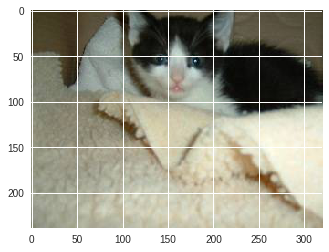

In [16]:
# check out an image
import os

# Just to be safe, reinstall PIL

# .listdir() = Return a list containing names of entries in dir given by path.
files = os.listdir(f'{PATH}valid/cats')[:5] 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [17]:
# check out dimesions of raw image (underlying data that makes up the cat pic)
img.shape

(239, 320, 3)

So,  the above image has 3 dimensions in an array, or a **RANK-3 TENSOR** 

In [18]:
# see 1st 4 rows and cols of the above image
img[:4,:4]

array([[[62, 55, 29],
        [62, 55, 29],
        [62, 55, 29],
        [62, 55, 29]],

       [[63, 56, 30],
        [63, 56, 30],
        [63, 56, 30],
        [63, 56, 30]],

       [[63, 56, 30],
        [63, 56, 30],
        [63, 56, 30],
        [63, 56, 30]],

       [[64, 57, 31],
        [64, 57, 31],
        [64, 57, 31],
        [64, 57, 31]]], dtype=uint8)

Each cells has 3 RGB pixel values. We will attempt to use these pixel values to predict if a picture is a cat or dog.

## 1st model: A Quick Start

Using a *pre-trained* model (created by some one else to solve a different problem) instead of building one from scratch to solve a similar problem. 

Using **resnet34** model, trained on **ImageNet** (1.2M images, 1k classes) as a starting point = a CNN = type of NN that builds state-of-the-art models for CV

(resnet34])[https://github.com/KaimingHe/deep-residual-networks] = a version of the model that won 2015 ImageNet competition. 

Train + evalulate dogs v. cats model in 4 lines of code, under 20 seconds:

In [19]:
arch = resnet34

# 'data' will contain the validation and training data 
#      specify w/ img size from before
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))

# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to .01 (how much to multiply gradient step in GD)
# setting epoch = 2 = looking over entire *validation* set of images 3 times
learn.fit(.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 82269473.18it/s]


100%|██████████| 32/32 [00:13<00:00,  2.31it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.052489   0.029595   0.99      
    1      0.056744   0.033341   0.99      
 11%|█         | 38/360 [00:01<00:15, 21.18it/s, loss=0.055]

    2      0.044054   0.034112   0.989     



[array([0.0341]), 0.989]

The above prints out  

* `[epoch# value of loss function (cross-entropy loss) for training, value of loss function for validation, accuracy]`

Prior to this competition, state of the art (2013) = 80% accuracy, + competition resulted in a huge jump to 98.9% accuracy via the author of a popular DL library. Extraordinarily, < 4 years later, we can now beat that result in seconds, + even last year in this course, initial model = 98.3% accuracy, nearly double the error just a year later, + that took ~10 minutes to compute.

### Analyzing Results

Can look at overall metrics like above, as well as examples of:

* random correct labels
* random incorrect labels
* most correct labels of each class (highest probability of that're correct)
* most incorrect labels of each class (highest probability of that're incorrect)
* most uncertainlabels (probabilty closest to .5)

In [20]:
# look at labels for validation data (cats = 0, dogs = 1)
print(data.classes,"\n")
print(data.val_y)

['cats', 'dogs'] 

[0 0 0 ... 1 1 1]


In [21]:
# learn.predict() return predictions for validation set (in log-scale)
log_preds = learn.predict()
print(log_preds.shape)

(2000, 2)


In [22]:
# gotten 2000 predictions of probabilities of 2 labels
# look @ 1st 10 predictions in [dog log prob, cat log prob] format
log_preds[:10]

array([[ -0.    , -10.2356],
       [ -0.0002,  -8.4066],
       [ -0.0001,  -9.5406],
       [ -0.0036,  -5.635 ],
       [ -0.0005,  -7.5434],
       [ -0.0591,  -2.8575],
       [ -0.0011,  -6.8296],
       [ -0.0012,  -6.7517],
       [ -0.0076,  -4.8791],
       [ -0.0017,  -6.3834]], dtype=float32)

In [0]:
# cobvert probabilities (across cols w/ axis=1) to binary label
preds = np.argmax(log_preds, axis = 1)

# get probability of being a dog and of being a cat
probs_dog = np.exp(log_preds[:,1])
probs_cat = np.exp(log_preds[:,0])

# set probs for plots below as probs_dog
probs = probs_dog

In [24]:
print("label predictions",preds[:5])
print("probability of being a dog",probs_dog[:5])
print("probability of being a cat",probs_cat[:5])

label predictions [0 0 0 0 0]
probability of being a dog [0.     0.0002 0.0001 0.0036 0.0005]
probability of being a cat [1.     0.9998 0.9999 0.9964 0.9995]


In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace=True)

def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows,len(ims)//rows, i+1)
    sp.axis('Off')
    
    if titles is not None:
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])
  
# def plot_val_with_title(idxs,title):
#  imgs = np.stack([data.val_ds[x][0] for x in idxs])
#  title_probs = [probs[x] for x in idxs]
#  print(title)
#  return plots(data.val_ds.denorm(imgs), rows=1, title=title_probs)

def load_img_id(ds,idx):
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs,title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly Classified


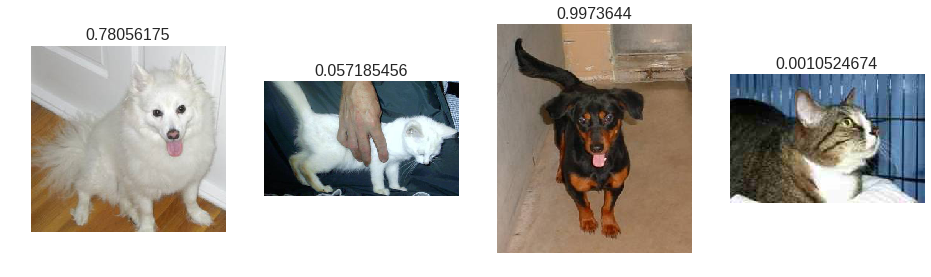

In [27]:
# look at some random correctly labelled images
plot_val_with_title(idxs=rand_by_correct(True),title='Correctly Classified')

Incorrectly Classified


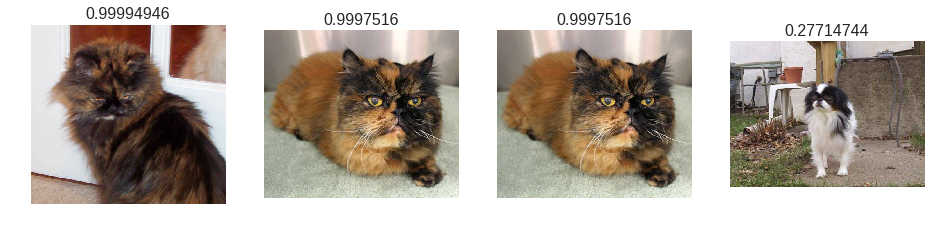

In [28]:
# look at some random incorrectly labelled images
plot_val_with_title(idxs=rand_by_correct(False),title='Incorrectly Classified')

In [0]:
def most_by_mask(mask,mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult*probs[idxs])[:4]]

def most_by_correct(y,is_correct):
  mult = -1 if (y==1) == is_correct else 1
  return most_by_mask(((preds==data.val_y) == is_correct) & (data.val_y == y), mult)

Most Correct Cats


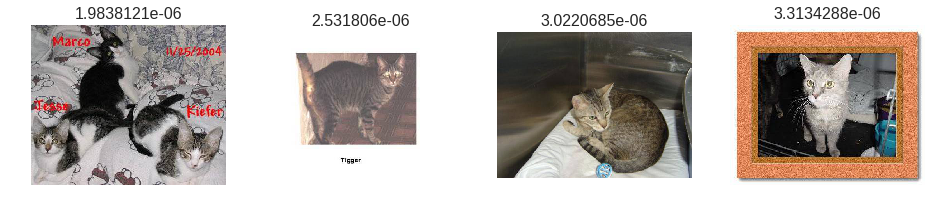

In [30]:
# check which its most confident are cats
plot_val_with_title(most_by_correct(y=0,is_correct=True),'Most Correct Cats')

Most Correct Dogs


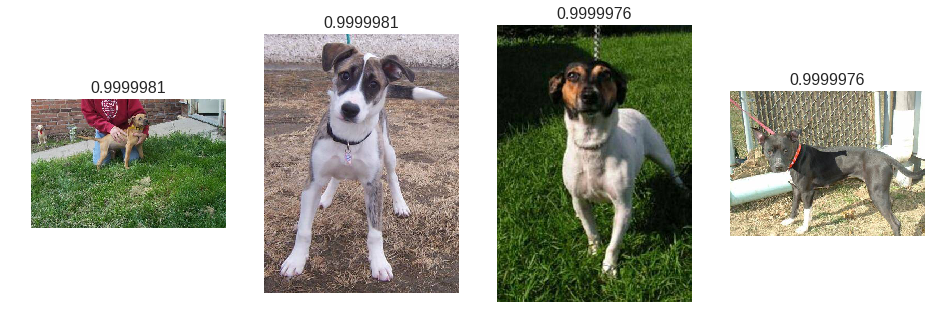

In [31]:
# check which its most confident are dogs
plot_val_with_title(most_by_correct(y=1,is_correct=True),'Most Correct Dogs')

Most Incorrect Cats


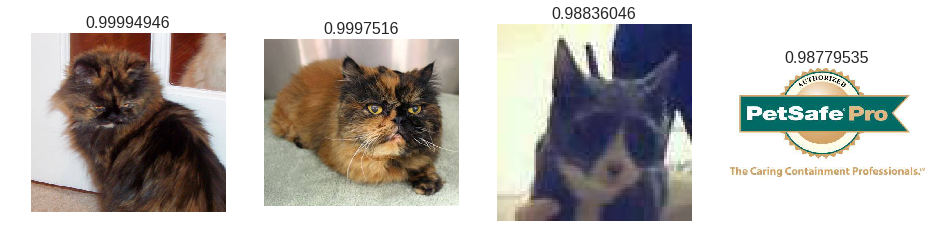

In [32]:
# what it thinks are correct (thinks are dogs but were actually cats)
# i.e. most confident its a dog but its a cat
plot_val_with_title(most_by_correct(y=0,is_correct=False),'Most Incorrect Cats')

Most Incorrect Dogs


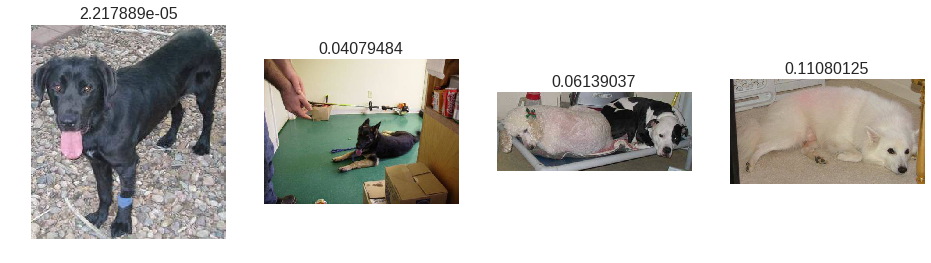

In [33]:
# what it thinks are incorrect (thinks are cats but were actually dogs)
# i.e. most confident its a cat but its a dog
plot_val_with_title(most_by_correct(y=1,is_correct=False),'Most Incorrect Dogs')

Most uncertain about


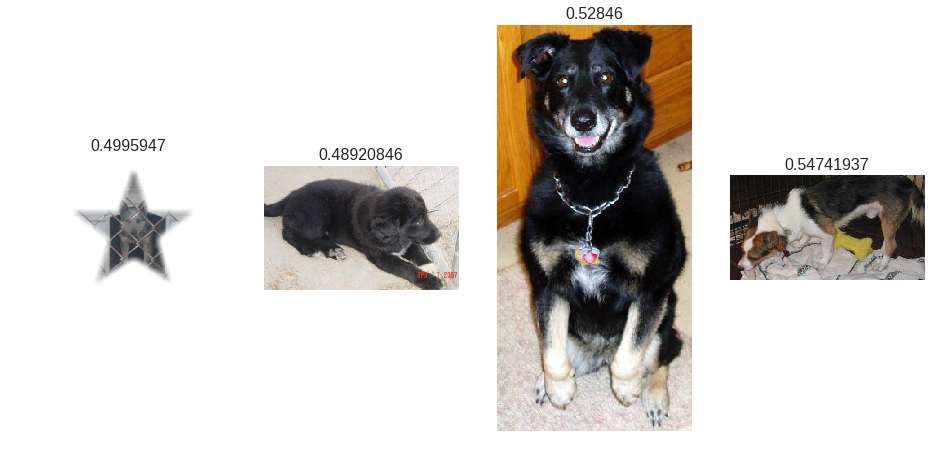

In [34]:
# see which imgs its most uncertain about (probability closest to threshold of .5)
# sort images after subtracting .5 and grab smallest (closes to .5 originally)
most_uncertain = np.argsort(np.abs(probs -.5))[:4]
plot_val_with_title(idxs=most_uncertain,title="Most uncertain about")

We want to look at our data b/c to double check what model is doing well and what it's doing badly (and may need to be fixed), and also to learn things about the data set ( such as what imgs shouldn't be there, like the logos).

One could now grab data (of different things) and put them into a similar dir structure as dogs and cats above and run the same model on it.

### Deep Learning

* from Arthur Samuel's chess-playing software (father of ML)
* traditional ML = difficult and knowledge + time-intensive
* See: Andrew Beck = computational pathologist (CPATH) @ Stanford (now @ Harvard)
  * took pathology slides of cancer, worked w/ many pathologists to figure out what patterns/features were associated w/ long-term survival vs. dying quickly
  * them, programmers wrote algorithms to capture said features that were passed into a logistic regression to predic survival (more accurate than real-life pathologists)
  * this approach took many years of work from domain experts + CS to build
* now much easier w/ DL = contains an **infinitely flexible function**, an **all-purpose parameter fitting** to fit parameters correctly to run the right function that is also **fast and scalable**
* gives a class of functions
* underlying function of FL = **neural network (NN)**  = nonlinear function composed of sums, likelihoods, and S
* NN = consists of a # of simple linear layers interspersed w/ simple non-linear layers
* interspersing supports **universal approximation theorem** = this kind of function can solve any kind of problem to arbitrarily close accuracy as long as enough parameters are added + are added *correctly* (i.e. NN are *proveably* shown to be an infinitely flexible function)
*  all-purpose parameter fitting is done typically via **gradient descent (GD)** = for different parameters, how good are they at solving the problem --> then figure out a slightly better set of parameters + follow the surace of the resulting loss function results downwards until finding the minimum, trying to hit global instead of local minima)
  * turns out, for NN in particular, there aren' actually mult. different local min, just one
  * i.e. there're different parts of the space that're equally good
  * problem = need to do the above in reasonable amt of time
  * GPU's have made this possible (~10x faster than CPU on log scale + are also cheaper)
* Unfortunately, turns out just 1 hidden layer requires exponentially increasing # of params to support universal approximation theorem = *not fast + scalable*
* this is solved via *multiple* hidden layers = super linear scaling (i.e. just a few more hidden layers = multiplicatively more accuracy to  multiplicatively more complex problems)
* this gives rise to **DL** = NN's w/ mult. hidden layers (father = Geoffrey Hinton [Google Brain, 2012])

In our CNN above, the key piece = the **convolution**
* convolution will go over the img pixels via a 3x3 grid to take the pixel w/in the grid + multiplies them by a 3x3 matrix of 9 **kernel values** + adds up the sum
* CNN then trys to find **edges** in the result of these resulting 3x3 matrix multiplication results
* this linear operation can make up a layer in our NN
* then we add a non-linear layer (takes input value + transforms it non-linearly, like sigmoid)
*  Now we typically use a **rectified linear units** (**Rectifier** or **ReLU's**) = take any negative values + replace w/ 0 + leave positive values as-are (`y = max(x,0)` in math terms to do the replacing)
* Key point of combo of linear layer into non-linear function layer = allows us to create arbitrarily complex shapes + combine them together to get to the essence of the universal approximation theorem + why NN's can solve many computable problems

To set these parameters, we use **stochastic (random) GD**
* basic idea = pick random points, move a little bit to some side, find derivative @ that point = direction that's *downward* = the **gradient**
* then move in this direction if its downward (towards the minimum)
* until we reach the minimum
* $x_{n+1} = {x_n} + \frac {dy} {dx}\lambda$
* $\lambda$ = **learning rate** = only want to take a small step in direction of the gradient b/c too large of a step leads to **divergence** not **convergence**
  * but too small = too long to converge
* check out (https://neuralnetworksanddeeplearning.com/chap4.html)

Combination of a convolution, non-linearity layers, + learning SGD = w/ enough kernels/layers, we can actually draw out the original images == i.e. very rich capabilities

This is what the cat vs. dog classifier did above





### Choosing a learning rate

**Learning rate** = how quickly/slowly to update the **weights**/**parameters** = 1 of the most difficult parameters to set, as it significantly affects model performance

Method `learn.lr_find()` from `fastai` library helps find optimal learning rates via a technique developed in [Cyclical Learning Rates for Training Neural Networks (Leslie Smith, 2015)](https://arxiv.org/abs/1506.01186) = keep increasing learning rate from very small value until **loss** stops decreasing (how far prediction is from goal) + then plot learning rate across **batches** to see what it looks like.
* finds at what point during GD we saw best improvement, then use that learning rate
* end up plotting learning rate vs. loss to find best value

1st, create a **learner** b/c we want to know how to set the learning rate for a new (untrained) model


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [36]:
lrf=learn.lr_find()

 85%|████████▌ | 306/360 [00:08<00:01, 35.43it/s, loss=0.531]


See our model was trained again but the model stops @ 84%, before the loss got too bad

`learn` object contains attribute = `sched` = contains our **learning rate scheduler** = has some convienent plotting functionality, such as 

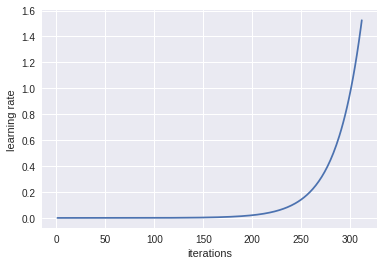

In [37]:
# how learning rate value increases w/ more iterations/minibatch of GD
learn.sched.plot_lr()

See learning rate increases exponentially after some **iteration/min-batch** of SGD 
* w/in each epoch, there's `num_train_samples/num_iterations` minibatches of SGD

Can then look @ learning rate vs. loss to see where loss stop stops decreasing

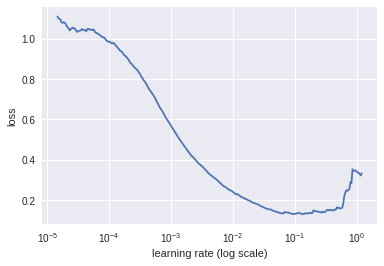

In [38]:
learn.sched.plot()

Want to find the highest possible learning rate such that loss is still decreasing/improving, which looks to be @ about =1e-2 (or 0.01)

So we use .01 in our `learn.fit()` call.

***Note***: Optimal learning rate can change as  model is trained, so you may want to re-run this function from time to time.

**Epoch** = go through the dataset and each time grab (say 64) images + use each of them once to try + improve the model a bit w/ GD
* choice of # of epochs = arbirtrary
* too many = accuracy may start getting worse
* may take too long w/ a large model/lots of data, so we just run enough epochs in time that's available

### Results

`[0.     0.064  0.0254 0.9907]
[1.     0.0511 0.0234 0.9912]
[2.     0.0552 0.0254 0.9893]`

These = our epochs, training loss, validation loss, + accuracy (want low loss, as **log loss = increasing penalties for being inaccurate w/ increasing confidence**)

### Learning Rate

LR = thing that decides how quickly we'll "zoom in" on the correct solution (minimum point of the function via the gradient + its direction = GD)
 * steeper gradient = further away
 
 Then multiply this gradient by the LR
 * too small = takes too long
 * too large = could overstep in that direction + then oscillate back + forth + end up getting further and further away = **divergence** = loss/accuracy going to infinity
 
 LR Finder will, in each iteration, look @ minibatch (some random imgs, 64-128 @ a time generally), use some small LR and then generally increase it w/ each iteration until LR is so big that loss starts getting worse (increasing)
 
 Want to look at that learning rate vs. loss plot + find the smallest LR such that loss is still decreasing 
 
We are **NOT** looking for the minimum = this is where loss is actually not getting better = LR is too high
 
Try looking @ min + going back 1 magnitude, say around `10e-2` above

Right now, this is the only hyperparameter we're tuning, and by playing w/ it = can get pretty good results

Most other hyperparameters are tuned by fastai lib (dozens of 'em and difficult to set)

BTS, fastai is trying to find the *correct GD version using the **[Adam optimization algorithm(https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)**

Most import thing **for \*\*\*\*DL\*\*\*\* algorithms** = more data

Challenge = hundreds of millions of parameters + after being trained for a while on data = overfitting starts (i.e. recognizing patterns specific to training data that're not true underlying patterns and won't generalize to new data)

Easier way to do this rather than collecting more data = ***data augmentation***, which is build into fastai lib

In the initial model code, we passed `tfms=tfms_from_model(arch,sz)` which were the **transforms** for the data (architecture and size), but we can also pass in a **list of specific data augmentation functions** into augment transforms arg = `aug_tfms`, such as `transform_side_on` = used if we have photos taken from the side, so we'd want to flip the horizontally (not vertically), rotate them by *smalll* amnts, + slightly vary brightness + contrast, lightly zoom in + out, etc. to get *slightly* different views of same image = **slightly changing data such that interpretation shouldn't be impacted**
* e.g. most photos of dogs +  cats = take from side so these functions work well for their pics, as opposed to photos taken from the top down like satellite imagery = `transforms_top_down`
* `transforms_side_on` = predefined list of functions
* also enable the random zooming of images up to specified scale of 1.1 via `max_zoom` parameter



In [0]:
# use resnet34 architecure, predefined image size of 224 in `sz`, list of augmentation functions, and max_zoom scale parameter
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

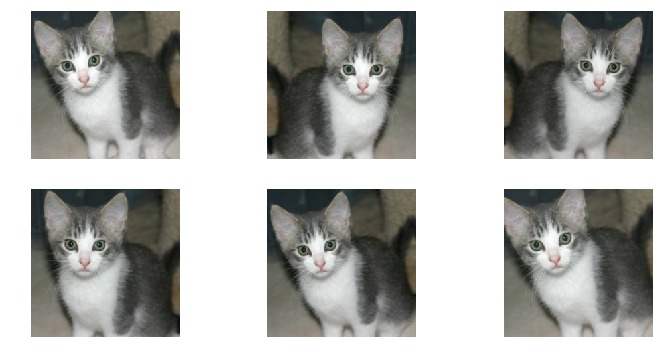

In [41]:
# this builds x different data classes via range(x) of the ***SAME** image
ims = np.stack([get_augs() for i in range(6)])

# plot x different classes of the same image
plots(ims, rows=2)

Doesn't *exactly* create new data, but it's a different way of looking @ things for the CNN + allows it to "learn" to see cats + dogs @ different angles by messing with images but keeping the same image

can now pass in our set of transforms `tfms` into `ImageClassifierData` for a new dataset and the learn on it

In [42]:
arch = resnet34
# use new transforms
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to one from plot above = 1e-2 in 2 epochs
learn.fit(1e-2,2)

epoch      trn_loss   val_loss   accuracy   
    0      0.070253   0.030753   0.9895    
    1      0.054638   0.035729   0.9865    



[array([0.0357]), 0.9865]

*Initially, augmentations don't do anything b/c of `precompute=True`*
* this is b/c layers of the NN have **activations**  (#'s) that say some feature (say eyeball of bird) is in some location w/ some level of confidence (probability)
* we have a *pre-trained* network that is trained to see/recognize certain things (~1.5M imgs in ImageNet dataset)
* can, for every image, take the 2nd-to-last layer (all info necessary to classify something) + **save those activations**
* these are our **precomputed activations**
* idea = when we want to create a new classifier that takes advantage of these precomputed activations to create a simple linear model
* may take a while to compute these (only has to do it once for a dataset, forever)
 
 This prevents our augmentation from working, so we need to turn it off before training



In [43]:
learn.precompute=False
learn.fit(1e-2,3,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.039372   0.025747   0.991     
 51%|█████     | 184/360 [01:28<01:24,  2.09it/s, loss=0.0463]

    1      0.041825   0.02524    0.99      
    2      0.041673   0.024959   0.9895    



[array([0.025]), 0.9895]

takes longer now

we got 

`[0.     0.0347 0.027  0.9912]
[1.     0.0372 0.0259 0.9907]
[2. 0.037  0.0257 0.9912]`

`[0.     0.0403 0.0253 0.9897]
[1.     0.0434 0.0238 0.9907]
  [2.     0.0352 0.0233 0.9917]`

Good news = training error decreasing
bad = validation isn't so much

BUT we're *not* overfitting (training loss << validation loss b/c doing better on training set)

BUT we're not really improving

idea of `cycle_len=1` = from recent discovery = **SGD *w/ restarts (SGDR)* = a variance of *learning rate ANNEALING*** = gradually decreases LR as training progresses  = helpful b/c *as we get closer to optimal weights, we want to take smaller steps so that we get to exactly the right spot for the solution for the function*
* most annealing done w/ some function from = typically **cosine annealing** = uses 1/2 of cosine curve (not close = high LR, drop it quickly, then quickly drop it + do some iterations w/ low LR, looking like horizontally-flipped sigmoid)

In high-dimensional spaces, we have many "flat" spaces that are not actually minima, all of which are pretty good
* solutions may not generalize well (bottom of a v on the loss plot)
* some of these flat pts = if we move a bit more in either direction on bottom of loss curve, we don't lose much accuracy (more robust)
* so we use a **learning rate schedule** which does the cosine annealing, then increases the LR, and repeats
* jumps out frmo "spiky" parts of the curve until it finds a flat bowl

May find selves in a part of the **weight space** that is not v. resilient (i.e. small changes to weights may result in big changes to loss)

Want to encourage model to find both *accurate and stable* areas of weight space

To do so, we, from time to time, **restart** the SGD = slightly increase LR to force model to "jump" to different part of weight space if the the current area "spiky"

`cycle_len` = # of **cycles** = # of epochs between resetting LR (i.e. making it jump again)
* 1 = reset after every epoch, 2 = after every 2 epochs, etc.

Can look at what new learning rates are in w/ this new parameter

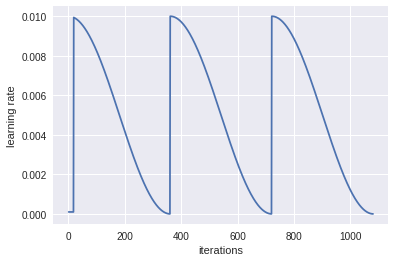

In [44]:
# LR w/ SGDR
learn.sched.plot_lr()

Validation loss is not improving much here == probs no point in further training the last layer on its own

Now we have pretty good model so we can save it to load again later w/out training from scratch

In [0]:
learn.save('224_lastlayer')

In [0]:
# then reload
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

The final layer has now been trained well and loaded in + we can fine tune other layers

In [0]:
# unfreeze other layers
learn.unfreeze()

These layers *have* been trained on ImageNet, contrary to the above final layer non-output layer where we did NOT pre-compute it = they're not randomly initialized

*we have not changed any of these early features/weights on top of the convolutional kernels*
* *all we've done is learn some NEW layers that we've layed on top of these pre-trained layers*

By unfreezing, we're prepared to start changing the convolutional filters

Earlier layers = more general-purpose features (generally speaking), so we use different LRs for different layers = **differential learning rates** (not official name as its not ubiquitous yet)
* 1st few = LR = 1e-4
* then = LR = 1e-3
* final ones = LR = 1e-2 like before
 * use smaller learning rates for earlier layers = they genearlly just can ID diagonal edges and/or gradients + basic geometric  features, so they need little if any new learning
 * later layers = need more learning as they are less general features =  more sophisticated convolutional features
 * final LR = for those features we've added from scratch
 
 do 3 cycles w/ this LR array

In [0]:
lrs = np.array([1e-4,1e-3,1e-2])
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.043252   0.027436   0.9895    
 51%|█████     | 184/360 [03:17<03:08,  1.07s/it, loss=0.0403]

    1      0.04345    0.02082    0.993     
    2      0.033298   0.018653   0.9925    
  1%|▏         | 5/360 [00:09<11:22,  1.92s/it, loss=0.0323]

    3      0.027714   0.019467   0.9925    
 74%|███████▎  | 265/360 [04:39<01:40,  1.05s/it, loss=0.0277]

    4      0.033174   0.021069   0.9915    
    5      0.021277   0.017916   0.9935    
 11%|█         | 39/360 [00:45<06:15,  1.17s/it, loss=0.0182]

 62%|██████▏   | 223/360 [03:51<02:22,  1.04s/it, loss=0.0165]

`0      0.043252   0.027436   0.9895
1      0.04345    0.02082    0.993     
2      0.033298   0.018653   0.9925    
3      0.027714   0.019467   0.9925    
4      0.033174   0.021069   0.9915    
5      0.021277   0.017916   0.9935  `

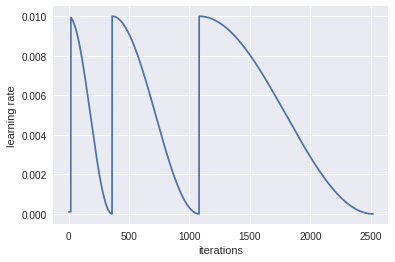

In [49]:
# plot outputs of FINAL layers
learn.sched.plot_lr()

LRs of earlier layers = fixed @ same multiples of the initially-requested final layers (1st layers = 100x smaller, middle = 10x)

`cycle_mult` parameter = doubles the length of each successive cycle (cycle 1, 2x, 4x, etc.)
* if cycle length = too short, it goes down but pops up too quick + never finds a good spot 
* want this to do this earlier to find smooth spots, but then slow down + search the area more

In [54]:
!ls data/dogscats

models	sample	test1  tmp  train  valid


In [64]:
!ls data/dogscats/tmp

x_act_resnet34_0_224.bc       x_act_val_resnet34_0_224.bc
x_act_test_resnet34_0_224.bc


See the temp dir contains all our precomputed activations

This can be deleted to see if any errors you're getting will go away (i.e. "turning it on and off again")

In [0]:
# save updated model layers
learn.save('224_all')
learn.load('224_all')

In [80]:
!ls data/dogscats/models

224_all.h5  224_lastlayer.h5  tmp.h5


Can also see we have our models as well

Pytorch models can be exported in different formats

Can also use data augmentation at **inference time/test time** = **test time augmentation (TTA)**, which simply makes predictions not just on validation set but also on randomly augmented versions of them (4 versions, by default) + takes the average prediction from those images

In [83]:
# perform test time augmentation (default = 4 extra imgs)
log_preds, y = learn.TTA()

# convert logs to normal floats and get the mean for
# the img + its augmentations for new probabilities of the image class
probs = np.mean(np.exp(log_preds),0)

# check accuracy on true values
accuracy_np(probs,y)

0.9925

Would generally hope tp see ~10-20% reduction in error on this dataset when using TTA at this point

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

[[993   7]
 [  8 992]]


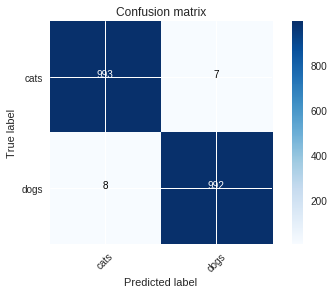

In [85]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)


So we have 984 TN's and 994 TP's for cats

#### Looking at pics again

1 thing to note is, for the GPU to work best, our classifer *takes squares out of the middle images such that all images are the same size*
* all height, as much width as possible

This can explain some of our incorrectly classified pictures.

This is what we use **TTA** for

Most incorrect cats


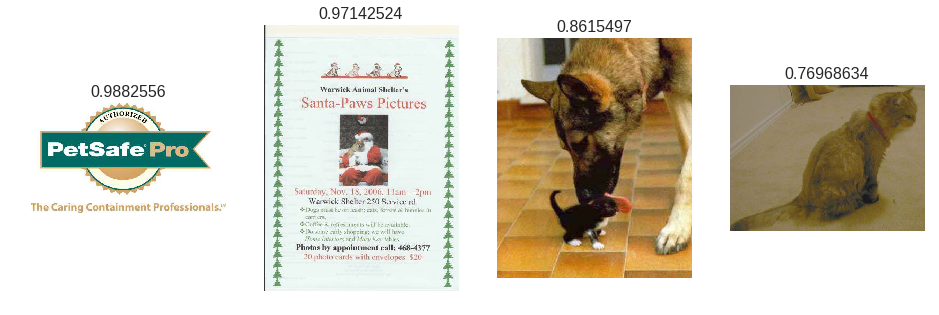

In [86]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")


* may see some "incorrect" cats w/ prob < .5, this is because our model did well enough that it was right in their classification, but confidence was low enough that `most_correct` picks them up

Most incorrect dogs


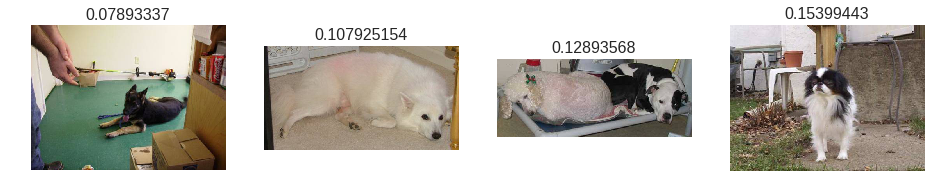

In [87]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")


#### Review: Easy steps to train a world-class image classifier

1. Enable data augmentation w/ `precompute=True`
2. Use `lr_find()` to find highest LR where loss is still clearly improving
3. Train last layer from precomputed activations for 1-2 epochs
4. Train last layer w/ data augmentation (i.e. `precompute=False`) for 2-3 epochs w/ `cycle_len=1`
5. Unfreeze all layers
6. Set earlier layers to 3x-10x lower LR than next higher layer
7. Use lr_find() again
8. Train full network w/ `cycle_mult=2` until over-fitting

In [72]:
tfms = tfms_from_model(resnet34, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(resnet34, data, precompute=True)
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.059341   0.025554   0.9925    



[array([0.0256]), 0.9925]

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [74]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018